# Postprocessing for the eigenvalue solutions

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, h5py, pickle
from pg_utils.processing import postproc as pproc
from pg_utils.pg_model import expansion as xpd
from pg_utils.pg_model import params
from pg_utils.numerics import utils as nutils
from sympy import srepr, parse_expr

---
## Eigenvalue comparison

Read in eigenvalue solutions

In [2]:
solution_file_list = [
    
    # # Different recipes for Malkus bg field
    # "./out/solutions/Malkus/Eigen_recipe-Daria_mm.hdf5", 
    # "./out/solutions/Malkus/Eigen_recipe-Daria.h5", 
    # "./out/solutions/Malkus/Eigen_recipe-Daria_scipy.h5", 
    # "./out/cases/Malkus/MM_recipe/Eigen.h5",
    # "./out/cases/Malkus/MM_quad_Malkus/Eigen.h5",
    
    # # Final three approaches for Malkus bg field
    # "./out/cases/Malkus/Full_recipe_Daria_thesis/Eigen.h5",
    # "./out/cases/Malkus/Conjugate_recipe/Eigen.h5", 
    # "./out/eigen/Malkus/Transformed/eigen_m3_N5.h5",
    # "./out/cases/Malkus/Reduced_sys/Eigen.h5",
    # "./out/eigen/Malkus/Reduced/eigen_m3_N5.h5"
    
    # Malkus bg field
    # "./out/eigen/Malkus/Original/eigen_m3_N50.h5",
    # "./out/eigen/Malkus/Transformed/eigen_m1_N50.h5",
    # "./out/archived/Malkus/Conjugate_recipe/Eigen_N100.h5",
    # "./out/eigen/Malkus/Reduced/eigen_m3_N50.h5",
    # "./out/eigen/Malkus/Reduced/eigen_m3_N50_cpt.h5",
    # "./out/eigen/Malkus/Reduced/eigen_m3_N50_quad-eigen-p113.h5",
    # "./out/eigen/Malkus/Reduced/eigen_m3_N50_quad-eigen-p113.pkl",
    # "./out/eigen/Malkus/Reduced/eigen_m3_N50_quad-eigen-p113_chop.pkl",
    
    # Hydrodynamic modes
    # "./out/eigen/Hydrodynamic/Transformed/eigen_m3_N50.h5",
    # "./out/eigen/Hydrodynamic/Reduced/eigen_m3_N50.h5",
    # "./out/eigen/Hydrodynamic/Reduced/eigen_m3_N50_quad-eigen-p113.h5",
    
    # Toroidal quadrupolar modes
    # "./out/eigen/Toroidal_Quadrupole/Transformed/eigen_m3_N50.h5",
    # "./out/eigen/Toroidal_Quadrupole/Reduced/eigen_m3_N50.h5",
    
    # Poloidal dipolar modes
    # "./out/eigen/Poloidal_Dipole/Transformed_ext/eigen_m3_Le1e-4_N30_p113.h5",
    # "./out/eigen/Poloidal_Dipole/Transformed_ext/eigen_m3_Le1e-4_N40_p113.h5",
    # "./out/eigen/Poloidal_Dipole/Transformed_ext/eigen_m3_Le1e-4_N50_p113.h5",
    # "./out/eigen/Poloidal_Dipole/Transformed_ext/eigen_m3_Le1e-4_N60_p113.h5",
    # "./out/eigen/Poloidal_Dipole/Transformed_ext/eigen_m3_Le1e-4_N80_p113.h5",
    # "./out/eigen/Poloidal_Dipole/Transformed_ext/eigen_m3_Le1e-4_N100_p113.h5",
    # "./out/eigen/Poloidal_Dipole/Transformed_ext/eigen_m3_Le1e-4_N120_p113.h5",
    # "./out/eigen/Poloidal_Dipole/Transformed_ext/eigen_m3_Le1e-4_N160_p113.h5",
    
    # "./out/eigen/Poloidal_Dipole/Transformed/eigen_m3_Le1e-4_N50_p113.h5",
    # "./out/eigen/Poloidal_Dipole/Transformed/eigen_m3_Le1e-4_N80_p113.h5",
    
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N30_p113_cpt.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N40_p113_cpt.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N50_p113_cpt.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N60_p113_cpt.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N80_p113_cpt.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N100_p113_cpt.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N120_p113_cpt.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N160_p113_cpt.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N200_p113_cpt.h5",
    "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N50_p113.h5",
    "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N80_p113.h5",
    "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N50_p113_cpt.h5",
    "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N80_p113_cpt.h5",
    "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N50_p113_hybrid.h5",
    "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N80_p113_hybrid.h5",
]

src_names = [
    
    # # Different recipes for Malkus bg field
    # "Code Daria Mathematica", 
    # "PlesioGeostroPy", 
    # "PlesioGeostroPy-scipy", 
    # "PlesioGeostroPy-PG-Daria",
    # "PlesioGeostroPy: Recipe Daria quad_Malkus",
    
    # # Final three approaches for Malkus bg field
    # "Recipe Holdenried-Chernoff (2021)",
    # "Transformed variables", 
    # "Conjugate variables (Unitary)", 
    # "Transformed vars [30]",
    # "Transformed vars [40]",
    # "Transformed vars [50]",
    # "Transformed vars [60]",
    # "Transformed vars [80]",
    # "Transformed vars [100]",
    # "Transformed vars [120]",
    # "Transformed vars [160]",
    
    # "Transformed vars (no boundary terms) [50]",
    # "Transformed vars (no boundary terms) [80]",
    
    # "Reduced system [30]",
    # "Reduced system [40]",
    "Reduced system [50]",
    # "Reduced system [60]",
    "Reduced system [80]",
    # "Reduced system [100]",
    # "Reduced system [120]",
    # "Reduced system [160]",
    # "Reduced system [200]",
    "Reduced system - compact [50]",
    "Reduced system - compact [80]",
    "Reduced system - hybrid [50]",
    "Reduced system - hybrid [80]",
    # "Naive diagonal F_ext",
    # "Compact F_ext",
    # "Double precision",
    # "Quadruple precision",
    # "Quadruple precision (chopped)",
    
    # Hydrodynamic modes
    # "Conjugate variables",
    # "Reduced system",
    
    # Toroidal quadrupolar modes
    # "Transformed variables",
    # "Reduced system",
]

solution_list = list()
for idx, fname in enumerate(solution_file_list):
    if fname.split('.')[-1] == "h5":
        with h5py.File(fname, 'r') as fread:
            solution_list.append(fread["eigval"][()])
            if "azm" in fread.attrs.keys():
                azm_val = fread.attrs["azm"]
                Le_val = fread.attrs["Le"]
            else:
                azm_val = fread.attrs[srepr(xpd.m)]
                Le_val = fread.attrs[srepr(params.Le)]
    elif fname.split('.')[-1] == "pkl":
        with open(fname, 'rb') as fread:
            serialized_obj = pickle.load(fread)
            solution_list.append(serialized_obj["eigval"])
            azm_val = serialized_obj["meta"][srepr(xpd.m)]
            Le_val = serialized_obj["meta"][srepr(params.Le)]

if "Mathematica" in src_names[0].split():
    solution_list[0] = 1j*solution_list[0]

Only if you want to convert everything to multi-prec:

In [3]:
solution_list = [nutils.to_gpmy2_c(eig_tmp, prec=113) for eig_tmp in solution_list]

### Sorting eigenmodes

East/west splitting. The following code block classifies the eigenvalues into
1. Eastwards modes and their eigenvalues (imaginary part smaller than a negative threshold)
2. Westwards modes and their eigenvalues (imaginary part greater than a positive threshold)

In [230]:
# func_collections = [
#     lambda x: pproc.filter_sort(x, filter_op=np.less, threshold=-1e-7, transform_filter=np.imag, transform_sort=np.imag),
#     lambda x: pproc.filter_sort(x, filter_op=np.greater, threshold=+1e-7, transform_filter=np.imag, transform_sort=np.imag)
# ]
func_collections = [
    lambda x: pproc.filter_sort(x, filter_op=np.less, threshold=-1e-7, transform_filter=lambda x: np.imag(x.astype(np.complex128)), transform_sort=lambda x: np.imag(x.astype(np.complex128))),
    lambda x: pproc.filter_sort(x, filter_op=np.greater, threshold=+1e-7, transform_filter=lambda x: np.imag(x.astype(np.complex128)), transform_sort=lambda x: np.imag(x.astype(np.complex128)))
]

Fast/slow splitting. The following code block classifies the eigenvalues into
1. Fast modes and their eigenvalues (absolute value of imaginary part greater than a threshold)
2. Slow modes and their eigenvalues (absolute value of imaginary part less than a threshold)

In [3]:
func_collections = [
    lambda x: pproc.filter_sort(x, filter_op=np.greater, threshold=1e+1, transform_filter=lambda x: np.abs(np.imag(x)), transform_sort=lambda x: np.abs(np.imag(x)), reversed=True),
    lambda x: pproc.filter_sort(x, filter_op=np.less, threshold=1e+1, transform_filter=lambda x: np.abs(np.imag(x)), transform_sort=lambda x: np.abs(np.imag(x)), remove_zero=1e-9)
]

Collect the results according to the classification criterion

In [4]:
df_collections = [pd.DataFrame() for func in func_collections]
# uniform_trunc = [51 for func in func_collections]
uniform_trunc = [51, 9]
for i_src, srcname in enumerate(src_names):
    eig_vals_classes = pproc.classify_eigens_criteria(solution_list[i_src], func_collections)
    eig_vals_classes = [eig_class[0] for eig_class in eig_vals_classes]
    for i_df, dftmp in enumerate(df_collections):
        dftmp[srcname] = eig_vals_classes[i_df][:uniform_trunc[i_df]]

In [5]:
df_collections[1].style.format(formatter=lambda x: "{0.real:.1e},{0.imag:.8e}j".format(x))

,Reduced system [50],Reduced system [80],Reduced system - compact [50],Reduced system - compact [80],Reduced system - hybrid [50],Reduced system - hybrid [80]
0,"4.5e-14,7.06852636e-03j","-1.5e-13,7.06851810e-03j","1.5e-14,7.03289119e-03j","3.1e-14,7.05674761e-03j","7.1e-15,7.06852636e-03j","-6.0e-15,7.06851810e-03j"
1,"-8.6e-15,1.17511985e-01j","-1.2e-13,1.17510943e-01j","7.2e-14,1.17779954e-01j","-4.6e-14,1.17599850e-01j","-1.0e-15,1.17511985e-01j","3.1e-15,1.17510943e-01j"
2,"-1.6e-13,3.49318397e-01j","3.1e-13,3.49297143e-01j","-2.7e-15,3.48106174e-01j","-3.9e-14,3.48896080e-01j","4.6e-15,3.49318397e-01j","-7.7e-15,3.49297143e-01j"
3,"-7.4e-13,7.55834035e-01j","-6.3e-12,7.55620452e-01j","-7.7e-16,7.59676370e-01j","1.5e-14,7.56966773e-01j","1.0e-14,7.55834035e-01j","7.7e-15,7.55620452e-01j"
4,"-1.5e-12,1.39849679e+00j","-2.2e-11,1.39708826e+00j","1.7e-14,1.38595494e+00j","6.9e-14,1.39297580e+00j","-1.7e-14,1.39849679e+00j","-1.9e-14,1.39708826e+00j"
5,"3.3e-12,2.34072068e+00j","-6.5e-11,2.33374394e+00j","-1.2e-13,2.36245370e+00j","-2.8e-14,2.34315015e+00j","-1.3e-14,2.34072068e+00j","-1.1e-15,2.33374394e+00j"
6,"7.1e-12,3.63868277e+00j","-4.0e-11,3.61070926e+00j","1.2e-13,3.55551464e+00j","1.2e-13,3.58197852e+00j","-1.0e-15,3.63868277e+00j","-9.8e-14,3.61070926e+00j"
7,"6.4e-12,5.33097943e+00j","8.8e-11,5.23703215e+00j","4.3e-14,5.38382349e+00j","-1.3e-12,5.27919967e+00j","-7.9e-15,5.33097943e+00j","-3.9e-14,5.23703215e+00j"
8,"1.3e-11,7.43604380e+00j","2.7e-10,7.17295518e+00j","-3.1e-13,7.05921643e+00j","2.2e-12,6.99138223e+00j","-2.5e-14,7.43604380e+00j","1.6e-13,7.17295518e+00j"


In [248]:
df_collections[1].iloc[:50, [8, 9, 12, 14, 2, 4]].style.format(formatter=lambda x: "{0.real:.1e},{0.imag:.8e}j".format(x))

,Transformed vars (no boundary terms) [50],Transformed vars (no boundary terms) [80],Reduced system [50],Reduced system [80],Transformed vars [50],Transformed vars [80]
0,"7.3e-14,-6.01771092e-03j","-8.5e-14,-6.01783854e-03j","1.5e-14,7.03289119e-03j","3.1e-14,7.05674761e-03j","-7.7e-12,7.03441851e-03j","-6.2e-11,7.05706989e-03j"
1,"-3.4e-14,7.94869580e-02j","-1.1e-14,7.94796225e-02j","7.2e-14,1.17779954e-01j","-4.6e-14,1.17599850e-01j","6.0e-14,1.17767935e-01j","-3.3e-12,1.17597316e-01j"
2,"-8.5e-16,2.68470317e-01j","-7.6e-14,2.68360873e-01j","-2.7e-15,3.48106174e-01j","-3.9e-14,3.48896080e-01j","-8.3e-14,3.48157159e-01j","7.7e-12,3.48907032e-01j"
3,"-3.9e-14,6.11120506e-01j","-1.1e-14,6.10309910e-01j","-7.7e-16,7.59676370e-01j","1.5e-14,7.56966773e-01j","-1.1e-12,7.59495824e-01j","6.9e-12,7.56928078e-01j"
4,"1.4e-14,1.16676943e+00j","2.2e-13,1.16254473e+00j","1.7e-14,1.38595494e+00j","6.9e-14,1.39297580e+00j","4.5e-12,1.38642505e+00j","-1.0e-11,1.39308391e+00j"
5,"-7.0e-14,1.99889686e+00j","-1.8e-13,1.98202966e+00j","-1.2e-13,2.36245370e+00j","-2.8e-14,2.34315015e+00j","-6.4e-12,2.36117477e+00j","3.8e-12,2.34285847e+00j"
6,"7.5e-14,3.16784032e+00j","-4.2e-13,3.11167931e+00j","1.2e-13,3.55551464e+00j","1.2e-13,3.58197852e+00j","6.4e-12,3.55782176e+00j","-5.2e-12,3.58263404e+00j"
7,"1.1e-13,4.72108788e+00j","6.0e-13,4.56297739e+00j","4.3e-14,5.38382349e+00j","-1.3e-12,5.27919967e+00j","-3.7e-12,5.37769148e+00j","2.9e-11,5.27747971e+00j"
8,"3.6e-14,6.69210928e+00j","6.1e-13,6.31773925e+00j","-3.1e-13,7.05921643e+00j","2.2e-12,6.99138223e+00j","1.1e-12,7.06588571e+00j","-3.2e-11,6.99426827e+00j"


In [234]:
df_collections[1].iloc[:50, 10:].style.format(formatter=lambda x: "{0.real:.1e},{0.imag:.8e}j".format(x))

,Reduced system [30],Reduced system [40],Reduced system [50],Reduced system [60],Reduced system [80],Reduced system [100],Reduced system [120],Reduced system [160],Reduced system [200]
0,"-1.4e-14,6.95488496e-03j","2.2e-14,7.00898027e-03j","1.5e-14,7.03289119e-03j","-3.5e-14,7.04524855e-03j","3.1e-14,7.05674761e-03j","2.5e-15,7.06162485e-03j","-1.3e-14,7.06408074e-03j","1.9e-15,7.06631421e-03j","1.4e-14,7.06724147e-03j"
1,"3.1e-14,1.18367705e-01j","-5.2e-14,1.17960228e-01j","7.2e-14,1.17779954e-01j","-5.9e-14,1.17686704e-01j","-4.6e-14,1.17599850e-01j","1.7e-15,1.17562978e-01j","-1.9e-15,1.17544401e-01j","-2.7e-14,1.17527499e-01j","7.2e-16,1.17520479e-01j"
2,"-3.1e-14,3.45657346e-01j","1.5e-14,3.47334762e-01j","-2.7e-15,3.48106174e-01j","-1.8e-15,3.48512657e-01j","-3.9e-14,3.48896080e-01j","-9.8e-15,3.49060352e-01j","6.2e-15,3.49143485e-01j","4.3e-14,3.49219360e-01j","-1.1e-14,3.49250949e-01j"
3,"1.1e-14,7.68218289e-01j","1.2e-14,7.62334658e-01j","-7.7e-16,7.59676370e-01j","-4.5e-14,7.58281822e-01j","1.5e-14,7.56966773e-01j","3.1e-14,7.56402278e-01j","9.2e-16,7.56115996e-01j","4.7e-15,7.55854077e-01j","6.4e-14,7.55744750e-01j"
4,"-5.2e-14,1.36925877e+00j","-1.7e-14,1.37990483e+00j","1.7e-14,1.38595494e+00j","1.4e-14,1.38945793e+00j","6.9e-14,1.39297580e+00j","-1.0e-13,1.39455255e+00j","5.5e-14,1.39536879e+00j","5.5e-14,1.39612674e+00j","-2.6e-13,1.39644699e+00j"
5,"8.9e-14,2.42233758e+00j","1.7e-16,2.38102221e+00j","-1.2e-13,2.36245370e+00j","1.2e-13,2.35261326e+00j","-2.8e-14,2.34315015e+00j","1.8e-13,2.33897958e+00j","-6.2e-14,2.33681977e+00j","1.2e-13,2.33480045e+00j","-5.8e-13,2.33393758e+00j"
6,"-1.7e-14,3.55582219e+00j","5.3e-14,3.54520176e+00j","1.2e-13,3.55551464e+00j","-1.1e-13,3.56665527e+00j","1.2e-13,3.58197852e+00j","-2.2e-13,3.59038340e+00j","-6.6e-14,3.59519013e+00j","-9.7e-14,3.60001346e+00j","1.2e-12,3.60219708e+00j"
7,"4.4e-14,5.70546412e+00j","1.8e-14,5.48399381e+00j","4.3e-14,5.38382349e+00j","2.3e-13,5.33079020e+00j","-1.3e-12,5.27919967e+00j","1.0e-12,5.25560322e+00j","-1.3e-12,5.24280050e+00j","-5.8e-13,5.23004852e+00j","1.1e-12,5.22414129e+00j"
8,"-1.1e-14,7.50291150e+00j","8.2e-14,7.18236764e+00j","-3.1e-13,7.05921643e+00j","-8.5e-13,7.01125185e+00j","2.2e-12,6.99138223e+00j","-1.5e-12,6.99882311e+00j","1.8e-12,7.00994591e+00j","2.0e-12,7.02809875e+00j","-6.5e-12,7.03981433e+00j"


In [235]:
df_collections[1].iloc[:50, :8].style.format(formatter=lambda x: "{0.real:.1e},{0.imag:.8e}j".format(x))

,Transformed vars [30],Transformed vars [40],Transformed vars [50],Transformed vars [60],Transformed vars [80],Transformed vars [100],Transformed vars [120],Transformed vars [160]
0,"-5.7e-13,6.96277481e-03j","-3.6e-13,7.01213906e-03j","-7.7e-12,7.03441851e-03j","1.6e-11,7.04608605e-03j","-6.2e-11,7.05706989e-03j","9.1e-11,7.06177845e-03j","-2.4e-11,7.06416445e-03j","5.2e-10,7.06634697e-03j"
1,"-2.1e-13,1.18305325e-01j","3.3e-13,1.17935340e-01j","6.0e-14,1.17767935e-01j","-3.9e-12,1.17680117e-01j","-3.3e-12,1.17597316e-01j","4.9e-12,1.17561772e-01j","6.1e-12,1.17543743e-01j","-1.0e-10,1.17527243e-01j"
2,"-4.3e-14,3.45907953e-01j","-5.7e-14,3.47438525e-01j","-8.3e-14,3.48157159e-01j","2.3e-12,3.48540864e-01j","7.7e-12,3.48907032e-01j","-2.1e-11,3.49065589e-01j","-3.5e-12,3.49146353e-01j","3.6e-11,3.49220476e-01j"
3,"1.1e-12,7.67311727e-01j","-6.5e-13,7.61965220e-01j","-1.1e-12,7.59495824e-01j","3.2e-12,7.58182120e-01j","6.9e-12,7.56928078e-01j","5.5e-12,7.56383764e-01j","3.8e-11,7.56105848e-01j","-6.7e-11,7.55850123e-01j"
4,"-1.2e-12,1.37121033e+00j","6.8e-13,1.38080842e+00j","4.5e-12,1.38642505e+00j","-1.4e-12,1.38972673e+00j","-1.0e-11,1.39308391e+00j","1.8e-11,1.39460520e+00j","-4.0e-11,1.39539796e+00j","2.3e-12,1.39613825e+00j"
5,"1.1e-12,2.41657869e+00j","3.7e-13,2.37850857e+00j","-6.4e-12,2.36117477e+00j","-6.2e-12,2.35188769e+00j","3.8e-12,2.34285847e+00j","-2.3e-11,2.33883676e+00j","6.1e-12,2.33674015e+00j","4.4e-11,2.33476864e+00j"
6,"-3.4e-13,3.56252704e+00j","8.0e-13,3.54905066e+00j","6.4e-12,3.55782176e+00j","5.5e-12,3.56810597e+00j","-5.2e-12,3.58263404e+00j","2.5e-11,3.59072549e+00j","3.1e-12,3.59538878e+00j","2.2e-10,3.60009700e+00j"
7,"-8.4e-13,5.68431464e+00j","-1.8e-12,5.47323825e+00j","-3.7e-12,5.37769148e+00j","-7.6e-13,5.32700066e+00j","2.9e-11,5.27747971e+00j","-3.5e-11,5.25468596e+00j","-4.3e-11,5.24225419e+00j","-1.8e-10,5.22980730e+00j"
8,"3.2e-13,7.51634652e+00j","-3.1e-13,7.19165398e+00j","1.1e-12,7.06588571e+00j","9.6e-13,7.01617743e+00j","-3.2e-11,6.99426827e+00j","3.1e-12,7.00065478e+00j","-1.7e-11,7.01118482e+00j","-9.3e-11,7.02875202e+00j"


### Convergence

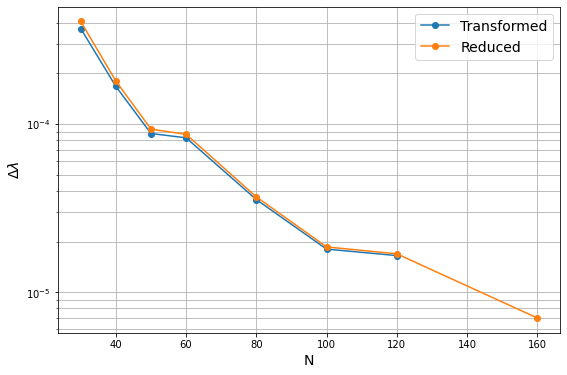

In [46]:
fig, ax = plt.subplots(figsize=(9, 6))

class_idx = 1
eig_idx = 1

eig_val_n = [
    # {"N": np.array([80, 120]), "diff": np.diff(df_collections[class_idx].iloc[eig_idx, :3].to_numpy()), "name": "Transformed"},
    # {"N": np.array([80, 120]), "diff": np.diff(df_collections[class_idx].iloc[eig_idx, 3:].to_numpy()), "name": "Reduced"},
    {"N": np.array([30, 40, 50, 60, 80, 100, 120, 160])[:-1], "diff": np.diff(df_collections[class_idx].iloc[eig_idx, :8].to_numpy()), "name": "Transformed"},
    {"N": np.array([30, 40, 50, 60, 80, 100, 120, 160, 200])[:-1], "diff": np.diff(df_collections[class_idx].iloc[eig_idx, 8:].to_numpy()), "name": "Reduced"},
    # {"N": np.array([30, 40, 50, 60, 80, 100, 120, 160]), "diff": df_collections[class_idx].iloc[eig_idx, :8].to_numpy() - df_collections[class_idx].iloc[eig_idx, -1], "name": "Transformed"},
    # {"N": np.array([30, 40, 50, 60, 80, 100, 120, 160]), "diff": df_collections[class_idx].iloc[eig_idx, 8:-1].to_numpy() - df_collections[class_idx].iloc[eig_idx, -1], "name": "Reduced"},
]

for series in eig_val_n:
    ax.semilogy(series["N"], np.abs(series["diff"]), 'o-', label=series["name"])
    # ax.loglog(series["N"], np.abs(series["diff"]), 'o-', label=series["name"])

ax.legend(fontsize=14)
ax.grid(which="both")
ax.set_xlabel("N", fontsize=14)
ax.set_ylabel(r"$\Delta \lambda$", fontsize=14)

plt.show()

### Add reference solution

If exists, the analytic solutions can be added.

In [10]:
from pg_utils.numerics import utils as nutils
import gmpy2 as gp

n_eigs = np.arange(1, 52)

# Malkus modes

omega_fast, omega_slow = nutils.eigenfreq_Malkus_pg(3, n_eigs, 1e-4, timescale="alfven", prec=113)
# omega_fast, omega_slow = nutils.eigenfreq_Malkus_pg(gp.mpfr(3, 113), nutils.to_gpmy2_f(n_eigs, prec=113), gp.mpfr("0.0001", 113), timescale="alfven", prec=113)
df_collections[0]["Analytic PG"] = omega_fast.astype(np.complex128)*1j
df_collections[1]["Analytic PG"] = omega_slow.astype(np.complex128)*1j
# Multi-prec
# with gp.local_context(gp.context(), precision=113):
#     df_collections[0]["Analytic PG"] = omega_fast*1j
#     df_collections[1]["Analytic PG"] = omega_slow*1j

omega_fast, omega_slow = nutils.eigenfreq_Malkus_3d(3, n_eigs, 1e-4, timescale="alfven")
df_collections[0]["Analytic 3D"] = omega_fast*1j
df_collections[1]["Analytic 3D"] = omega_slow*1j

# Inertial modes

# omega_inertial = nutils.eigenfreq_psi_op(3, n_eigs)
# df_collections[0]["Analytic PG"] = omega_inertial*1j

# omega_inertial_3d = nutils.eigenfreq_inertial3d(3, n_eigs)
# df_collections[0]["Analytic 3D"] = omega_inertial_3d*1j

In [63]:
df_collections[1].iloc[:10, :].style.format(formatter=lambda x: "{0.real:.2e},{0.imag:.25e}j".format(x))

,PlesioGeostroPy,Analytic PG,Analytic 3D
0,"7.27e-17,4.1249927684389540299969568e-03j","0.00e+00,4.1249927683931417177198853e-03j","0.00e+00,3.8545349007617071487863392e-03j"
1,"1.18e-15,8.0249447235597459737732606e-03j","0.00e+00,8.0249447235502535669127155e-03j","0.00e+00,7.8795504967614834329614482e-03j"
2,"-1.70e-15,1.3124754530664594492916919e-02j","0.00e+00,1.3124754530679804548354284e-02j","0.00e+00,1.3033436001613982191393859e-02j"
3,"1.64e-15,1.9424198238608480354683294e-02j","0.00e+00,1.9424198238605409894130815e-02j","0.00e+00,1.9361511915293633939727513e-02j"
4,"-3.95e-16,2.6922855681203273353618854e-02j","0.00e+00,2.6922855681206996070198301e-02j","0.00e+00,2.6877183303049837631570895e-02j"
5,"1.66e-15,3.5620020015631081999885055e-02j","0.00e+00,3.5620020015638090282728001e-02j","0.00e+00,3.5585279253392589071669505e-02j"
6,"2.47e-15,4.5514590320897573005876069e-02j","0.00e+00,4.5514590320886436081160298e-02j","0.00e+00,4.5487287156795758180649614e-02j"
7,"-3.37e-15,5.6604947548453347916375122e-02j","0.00e+00,5.6604947548455568362424373e-02j","0.00e+00,5.6582932502770653948598323e-02j"
8,"1.47e-15,6.8888814275920820517917775e-02j","0.00e+00,6.8888814275918808238685642e-02j","0.00e+00,6.8870692992012691457937024e-02j"
9,"1.85e-15,8.2363098919414887144618831e-02j","0.00e+00,8.2363098919416649623670423e-02j","0.00e+00,8.2347927698420794739853079e-02j"


Additionally, compute the difference from reference

In [64]:
df_compare = df_collections[0]
ref_name = "Analytic PG"

df_compare_err = pd.DataFrame()
for idx, srcname in enumerate(src_names):
    df_compare_err[srcname] = np.abs(df_compare[ref_name] - df_compare[srcname])/np.abs(df_compare[ref_name])

df_compare_err.iloc[:10, :].style.format(formatter=lambda x: "{:.7e}".format(x))

,PlesioGeostroPy
0,1.9326729e-16
1,9.7585783e-16
2,4.8600214e-16
3,6.1589669e-16
4,5.3173189e-16
5,3.1310662e-15
6,3.1445450e-15
7,1.4662551e-15
8,1.0830088e-15
9,4.0975788e-16


### Eigenvalue plot

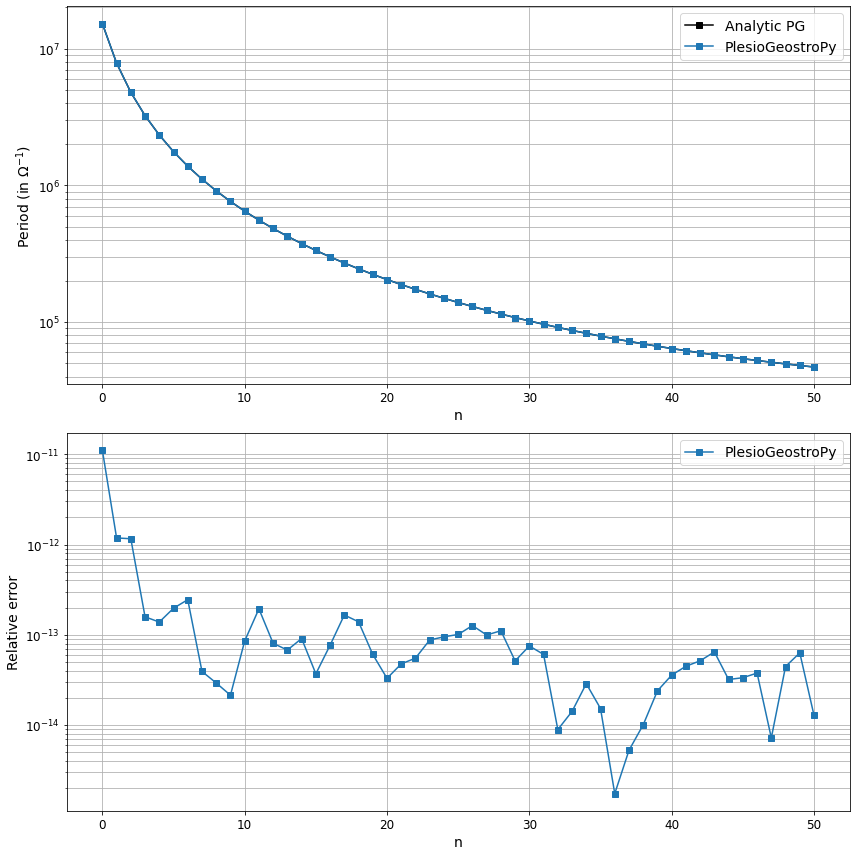

In [65]:
df_view = df_collections[1]
ref_name = "Analytic PG"
df_err_view = pd.DataFrame()
for idx, srcname in enumerate(src_names):
    # df_err_view[srcname] = np.abs(df_view[ref_name] - df_view[srcname])/np.abs(df_view[ref_name])
    df_err_view[srcname] = np.abs(np.imag((df_view[ref_name] - df_view[srcname]).astype(np.complex_)))/np.abs(np.imag(df_view[ref_name].astype(np.complex_)))
n_view = 51

# save_name = "./out/eigen/Hydrodynamic/Analytical_error"
# save_name = "./out/eigen/Malkus/Reduced/Analytical_error_precision_slow"
save_name = None
override = True

if df_err_view is None:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
    ax = axes
else:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
    ax = axes[0]

# Use if Alfven time scale is used
scale = 1/Le_val
# Use if rotation time scale is used
# scale = 1

ax.semilogy(np.arange(n_view), 2*np.pi*scale/np.abs(np.imag(df_view[ref_name].iloc[:n_view].astype(np.complex_))), 'ks-', label=ref_name)
for idx, srcname in enumerate(src_names):
    ax.semilogy(np.arange(n_view), 2*np.pi*scale/np.abs(np.imag(df_view[srcname][:n_view].astype(np.complex_))), 's-', label=srcname)
ax.grid(which="both")
ax.legend(fontsize=14)
ax.set_xlabel("n", fontsize=14)
ax.set_ylabel("Period (in $\Omega^{-1}$)", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

if df_err_view is not None:
    ax = axes[1]
    for idx, srcname in enumerate(src_names):
        ax.semilogy(np.arange(n_view), df_err_view[srcname][:n_view], 's-', label=srcname)
    ax.grid(which="both")
    ax.legend(fontsize=14)
    ax.set_xlabel("n", fontsize=14)
    ax.set_ylabel("Relative error", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    # ax.set_ylim([1e-17, 1e-12])

plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.pdf') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.pdf', format="pdf", bbox_inches="tight")
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")
plt.show()

#### Production code: Malkus results

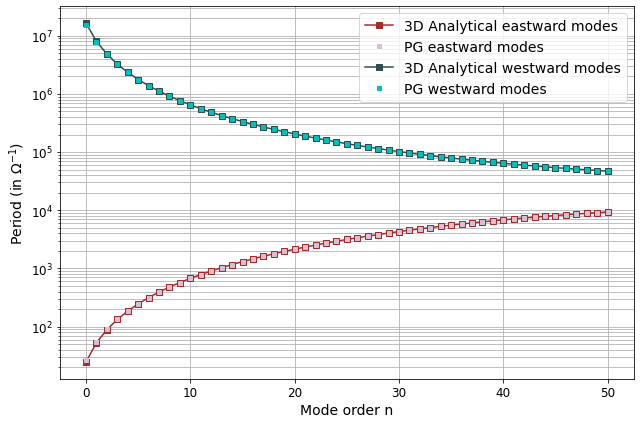

In [127]:
ref_name = "Analytic 3D"
df_err_view = None
# df_err_view = pd.DataFrame()
# for idx, srcname in enumerate(src_names):
#     df_err_view[srcname] = np.abs(np.imag((df_view[ref_name] - df_view[srcname]).astype(np.complex_)))/np.abs(np.imag(df_view[ref_name].astype(np.complex_)))
n_view = 51

save_name = "./out/imgs/Malkus_both.png"
# save_name = None
override = True

if df_err_view is None:
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    ax = axes
else:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
    ax = axes[0]

# Use if Alfven time scale is used
scale = 1/Le_val
# Use if rotation time scale is used
# scale = 1

df_view = df_collections[0]
ax.semilogy(np.arange(n_view), 2*np.pi*scale/np.abs(np.imag(df_view[ref_name].iloc[:n_view].astype(np.complex_))), 's-', color='brown', markersize=6, label="3D Analytical eastward modes")
for idx, srcname in enumerate(src_names):
    ax.semilogy(np.arange(n_view), 2*np.pi*scale/np.abs(np.imag(df_view[srcname][:n_view].astype(np.complex_))), 's', color='thistle', markersize=4, label="PG eastward modes")

df_view = df_collections[1]
ax.semilogy(np.arange(n_view), 2*np.pi*scale/np.abs(np.imag(df_view[ref_name].iloc[:n_view].astype(np.complex_))), 's-', color='darkslategray', markersize=6, label="3D Analytical westward modes")
for idx, srcname in enumerate(src_names):
    ax.semilogy(np.arange(n_view), 2*np.pi*scale/np.abs(np.imag(df_view[srcname][:n_view].astype(np.complex_))), 's', color='c', markersize=4, label="PG westward modes")

ax.grid(which="both")
ax.legend(fontsize=14)
ax.set_xlabel("Mode order n", fontsize=14)
ax.set_ylabel("Period (in $\Omega^{-1}$)", fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

if df_err_view is not None:
    ax = axes[1]
    for idx, srcname in enumerate(src_names):
        ax.semilogy(np.arange(n_view), df_err_view[srcname][:n_view], 's-', label=srcname)
    ax.grid(which="both")
    ax.legend(fontsize=14)
    ax.set_xlabel("n", fontsize=14)
    ax.set_ylabel("Relative error", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    # ax.set_ylim([1e-17, 1e-12])

plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.pdf') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.pdf', format="pdf", bbox_inches="tight")
        plt.savefig(save_name + '.png', format="png", dpi=300, bbox_inches="tight")
plt.show()

---
## Eigenmode visualization

Reading data

In [47]:
from scipy import special as specfun
from pg_utils.pg_model import core, base, params
from pg_utils.pg_model import expansion as xpd
from pg_utils.numerics import matrices as nmatrix

# eigenfile = "./out/eigen/Hydrodynamic/Reduced/eigen_m1_N50.h5"
# eigenfile = "./out/cases/Malkus/Full_recipe_Daria_thesis/Eigen.h5"
# eigenfile = "./out/eigen/Malkus/Original/eigen_m3_N50.h5"
# eigenfile = "./out/eigen/Malkus/Transformed/eigen_m3_N50.h5"
# eigenfile = "./out/eigen/Malkus/Reduced/eigen_m3_N50.h5"
# eigenfile = "./out/eigen/Toroidal_Quadrupole/Transformed/eigen_m3_Le-2_N50.h5"
# eigenfile = "./out/eigen/Toroidal_Quadrupole/Reduced/eigen_m3_Le-2_N80.h5"
# eigenfile = "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_N50.h5"
eigenfile = "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N120_p113_hybrid.h5"
# eigenfile = "./out/eigen/Poloidal_Dipole/Reduced/eigen_m1_Le1e-4_N80_p113.h5"
# eigenfile = "./out/eigen/Poloidal_Dipole/Transformed_ext/eigen_m3_Le1e-4_N160_p113.h5"

with h5py.File(eigenfile, 'r') as fread:
    xpd_identifier = fread.attrs["xpd"]
    if "azm" in fread.attrs.keys():
        azm_val = int(fread.attrs["azm"])
        Le_val = fread.attrs["Le"]
    else:
        azm_val = int(fread.attrs[srepr(xpd.m)])
        Le_val = fread.attrs[srepr(params.Le)]
    cnames = list(fread["bases"]["names"].asstr()[()])
    ranges_trial = fread["bases"]["ranges"][()]
    eig_vals = fread["eigval"][()]
    eig_vecs = fread["eigvec"][()]

# Physical params
physical_params = {
    core.t: 0,
    xpd.m: azm_val,
    params.Le: Le_val
}

### Sorting eigenmodes

East/west splitting. The following code block classifies the eigenvalues into
1. Eastwards modes and their eigenvalues (imaginary part smaller than a negative threshold)
2. Westwards modes and their eigenvalues (imaginary part greater than a positive threshold)

In [3]:
func_collections = [
    lambda x: pproc.filter_sort(x, filter_op=np.less, threshold=-1e-7, transform_filter=np.imag, transform_sort=np.imag),
    lambda x: pproc.filter_sort(x, filter_op=np.greater, threshold=+1e-7, transform_filter=np.imag, transform_sort=np.imag)
]

Fast/slow splitting. The following code block classifies the eigenvalues into
1. Fast modes and their eigenvalues (absolute value of imaginary part greater than a threshold)
2. Slow modes and their eigenvalues (absolute value of imaginary part less than a threshold)

In [48]:
func_collections = [
    lambda x: pproc.filter_sort(x, filter_op=np.greater, threshold=1e+1, transform_filter=lambda x: np.abs(np.imag(x)), transform_sort=lambda x: np.abs(np.imag(x)), reversed=True),
    lambda x: pproc.filter_sort(x, filter_op=np.less, threshold=1e+1, transform_filter=lambda x: np.abs(np.imag(x)), transform_sort=lambda x: np.abs(np.imag(x)), remove_zero=1e-9)
]

Collect the results according to the classification criterion

In [49]:
eig_vals_classes = pproc.classify_eigens_criteria(eig_vals, func_collections)
eig_vecs_classes = [eig_vecs[:, eig_class[1]] for eig_class in eig_vals_classes]
eig_vals_classes = [eig_class[0] for eig_class in eig_vals_classes]

### Eigen solution filtering

(Optional)  
An additional resolution dataset is needed for filtering

In [50]:
# comp_file = "./out/eigen/Poloidal_Dipole/Reduced/eigen_m1_Le1e-4_N50_p113.h5"
comp_file = "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N80_p113_hybrid.h5"
# comp_file = "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N160_p113_cpt.h5"
# comp_file = "./out/eigen/Poloidal_Dipole/Transformed_ext/eigen_m3_Le1e-4_N120_p113.h5"

with h5py.File(comp_file, 'r') as fread:
    eig_vals_comp = fread["eigval"][()]

eig_vals_classes_comp = pproc.classify_eigens_criteria(eig_vals_comp, func_collections)
eig_vals_classes_comp = [eig_class[0] for eig_class in eig_vals_classes_comp]

Using Boyd's drift method:

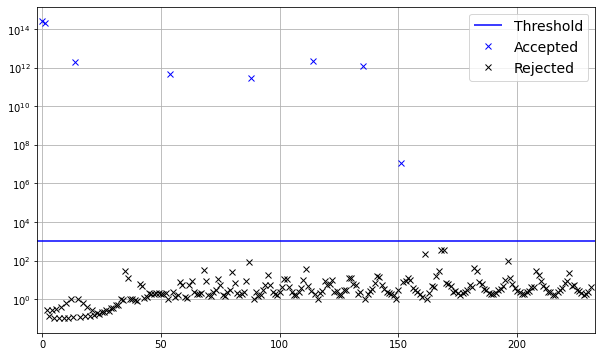

In [51]:
class_idx = 0

src_idx_base = 0
src_idx_comp = 1

eig_drift, eig_nearest = nutils.eigen_drift(eig_vals_classes[class_idx], eig_vals_classes_comp[class_idx], mode="global")
drift_thresh = 1e+3
drift_filter = 1./(eig_drift + 1e-16) > drift_thresh

fig, ax = plt.subplots(figsize=(10, 6))
ax.hlines([drift_thresh,], -2, eig_drift.size + 1, 'b', label="Threshold")
ax.semilogy(np.arange(eig_drift.size)[drift_filter], 1./(eig_drift[drift_filter] + 1e-16), 'bx', label="Accepted")
ax.semilogy(np.arange(eig_drift.size)[~drift_filter], 1./(eig_drift[~drift_filter] + 1e-16), 'kx', label="Rejected")
ax.grid(which="both")
ax.set_xlim([-2, eig_drift.size + 1])
ax.legend(fontsize=14)

plt.show()

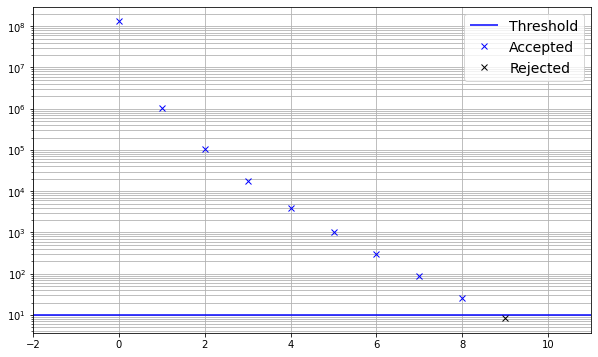

In [53]:
class_idx = 1

src_idx_base = 0
src_idx_comp = 1

eig_drift, eig_nearest = nutils.eigen_drift(eig_vals_classes[class_idx], eig_vals_classes_comp[class_idx])
drift_thresh = 1e+1
drift_filter = 1./(eig_drift + 1e-16) > drift_thresh

fig, ax = plt.subplots(figsize=(10, 6))
ax.hlines([drift_thresh,], -2, eig_drift.size + 1, 'b', label="Threshold")
ax.semilogy(np.arange(eig_drift.size)[drift_filter], 1./(eig_drift[drift_filter] + 1e-16), 'bx', label="Accepted")
ax.semilogy(np.arange(eig_drift.size)[~drift_filter], 1./(eig_drift[~drift_filter] + 1e-16), 'kx', label="Rejected")
ax.grid(which="both")
ax.set_xlim([-2, eig_drift.size + 1])
ax.legend(fontsize=14)

plt.show()

Apply the filter (optional)

In [54]:
final_filter = drift_filter

# Filter eigenvalues
eig_vals_classes[class_idx] = eig_vals_classes[class_idx][final_filter]

# Filter eigenvectors
eig_vecs_classes[class_idx] = eig_vecs_classes[class_idx][:, final_filter]

### Configure the expansion

PG form

In [12]:
from pg_utils.pg_model import expand_daria_thesis as xpd_cfg

field_func = pproc.get_eigen_field_function(xpd_cfg.recipe, physical_params)

fnames = field_func._field_names
field_nrange = {
    fname: ranges_trial[i_field] if i_field < ranges_trial.size else ranges_trial[0] 
    for i_field, fname in enumerate(fnames)}

Transformed form

In [56]:
from pg_utils.pg_model import expand_conjugate_ext as xpd_cfg

field_func = pproc.eigen_func_from_conjugate(xpd_cfg.recipe, physical_params)

fnames = field_func._field_names
fnames = field_func._field_names
field_nrange = {
    fname: ranges_trial[i_field] if i_field < ranges_trial.size else ranges_trial[0] 
    for i_field, fname in enumerate(fnames)}

Reduced sys

In [55]:
from pg_utils.pg_model import expand_stream_force_hybrid as xpd_cfg

field_func = pproc.eigen_func_from_reduced(xpd_cfg.recipe, physical_params)

fnames = field_func._field_names
field_nrange = {
    fname: ranges_trial[i_field] if i_field < ranges_trial.size else ranges_trial[0] 
    for i_field, fname in enumerate(fnames)}

### Select eigenmode

In [17]:
eig_vals_classes[1]

array([ 7.05745395e-15+0.00706853j, -1.04119666e-15+0.11751199j,
        4.60659924e-15+0.3493184j ,  1.01391187e-14+0.75583403j,
       -1.66939194e-14+1.39849679j, -1.26079554e-14+2.34072068j,
       -9.95963910e-16+3.63868277j, -7.88996705e-15+5.33097943j])

In [56]:
eig_vals_classes

[array([-1.77966366e-15-2352.9308595j ,  1.33226763e-15-1165.17184393j,
         1.13686838e-13 -702.23779241j, -1.19753686e-12 -471.81032275j,
        -8.89150690e-14 -340.55481028j,  1.70882517e-13 -259.39104991j,
         7.75023915e-14 -206.72468529j,  3.10146814e-14 -171.86267603j]),
 array([ 1.48803603e-14+7.06851725e-03j, -1.38869308e-14+1.17510835e-01j,
         7.80805370e-15+3.49294899e-01j,  2.61932607e-15+7.55597173e-01j,
        -1.00943357e-14+1.39692569e+00j, -1.44797632e-14+2.33285371e+00j,
        -3.98351369e-14+3.60648410e+00j, -4.08664059e-13+5.21857248e+00j,
         1.07183418e-14+7.09945329e+00j])]

In [57]:
class_idx, mode_idx = 0, 5
eigval = eig_vals_classes[class_idx][mode_idx]
eigvec = eig_vecs_classes[class_idx][:, mode_idx]

eigvec = nmatrix.LabeledBlockArray(eigvec, cnames, ranges_trial)
eigvec = base.LabeledCollection(cnames, 
    **{cname: eigvec[cname] for cname in cnames})
map_coeff_vals = base.map_collection(xpd_cfg.recipe.rad_xpd.coeffs, eigvec)

### Radial profile

For radial plot, $\phi=Cst$, $z=Cst$.

In [19]:
p_cst = 0
z_cst = 0
s_array = np.linspace(0, 1, num=200)
# xi_array, _ = specfun.roots_chebyt(100)
# s_array = np.r_[0, np.sqrt((1 + xi_array)/2), 1]
# s_array = np.sqrt((1 + xi_array)/2)

Calculate all fields

In [33]:
def calc_field_rad(fname, field_f):
    # print(fname)
    S_mesh, N_mesh = np.meshgrid(s_array, np.arange(field_nrange[fname]), indexing='ij')
    eval_tmp = field_f(S_mesh, p_cst, z_cst, N_mesh, *[vec for vec in eigvec])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_mesh[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    # print(eval_tmp.shape)
    return np.sum(eval_tmp, axis=-1)

eigmode_eval = field_func.apply(calc_field_rad, inplace=False, metadata=True)

Plot all fields

In [34]:
max_idx = np.argmax(np.abs(eigmode_eval["Psi"]))
phase = -np.angle(eigmode_eval["Psi"][max_idx])
# phase_diff = -np.pi/12
# phase_factor = np.exp(1j*(phase + phase_diff))
p_diff = - np.pi/12
phase_factor = np.exp(1j*(phase + 3*p_diff))

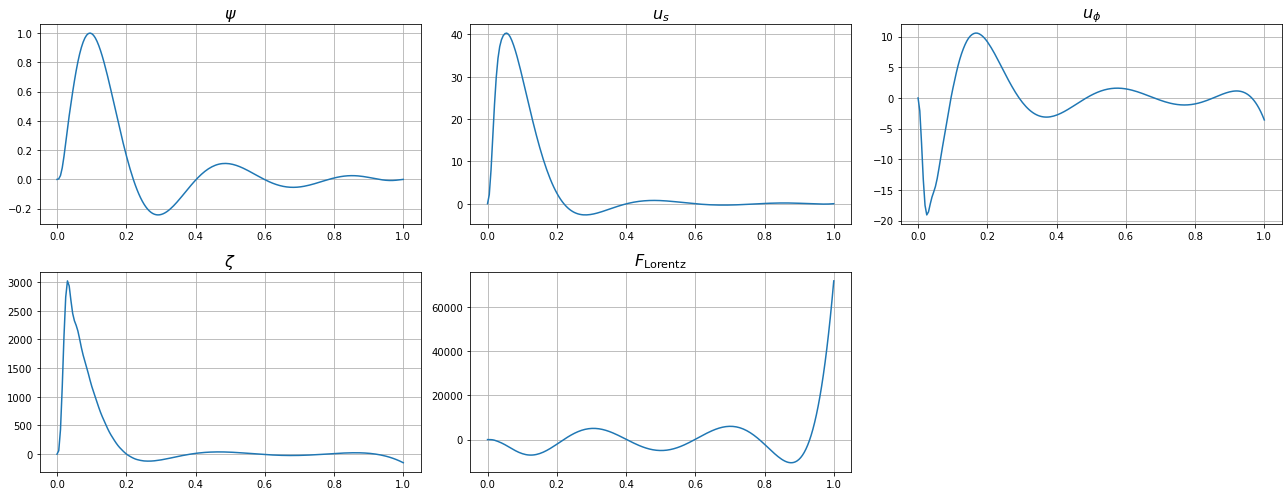

In [35]:
# plot_fields = [["Psi", "U_s", "U_p"],
#                ["Mss", "Mpp", "Msp"], 
#                ["Msz", "Mpz", "Zeta"], 
#                ["zMss", "zMpp", "zMsp"], 
#                ["Bs_e", "Bp_e", "Bz_e"]]
# plot_fnames = [[None, "$u_s$", r"$u_\phi$"],
#                [None, None, None],
#                [None, None, r"$\zeta$"],
#                [None, None, None], 
#                [None, None, None],]
plot_fields = [["Psi", "U_s", "U_p"],
               ["Zeta", "F_ext", None]]
plot_fnames = [[None, "$u_s$", r"$u_\phi$"],
               [r"$\zeta$", r"$F_\mathrm{Lorentz}$", None]]

save_name = "./out/eigen/Poloidal_Dipole/Reduced/mode-s_radial_m3n5_N120_hybrid"
# save_name = None
override = False
normalizer = np.max(np.abs(np.real(phase_factor*eigmode_eval["Psi"])))

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*3.5))

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        ax = axes[i_r][i_c]
        if fname is None:
            ax.remove()
            continue
        ax.plot(s_array, np.real(phase_factor*eigmode_eval[fname])/normalizer)
        if np.abs(np.real(phase_factor*eigmode_eval[fname])/normalizer).max() < 1e-5:
            ax.set_ylim([-1e-5, +1e-5])
        if fname in core.pgvar._field_names:
            ax.set_title(r'$%s$' % (core.pgvar_ptb[fname].name,), fontsize=16)
        else:
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
        ax.grid(True)

plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

### Equatorial section

For Equatorial plane section, $z=0$. $s$ and $p$ form a mesh of grid points.

In [80]:
z_cst = 0
s_array = np.linspace(0, 1, num=100)
# xi_array, _ = specfun.roots_chebyt(100)
s_array = np.r_[0, np.sqrt((1 + xi_array)/2), 1]
p_array = np.linspace(0, 2*np.pi, num=400)

Calculate all fields

In [81]:
def calc_field_equatorial(fname, field_f):
    N_trial = field_nrange[fname]
    S_tmp, N_tmp = np.meshgrid(s_array, np.arange(field_nrange[fname]), indexing='ij')
    eval_tmp = field_f(S_tmp, 0., z_cst, N_tmp, *[vec for vec in eigvec])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_mesh[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    eval_rad = np.sum(eval_tmp, axis=-1)
    eval_azm = np.exp(1j*physical_params[xpd.m]*p_array)
    return np.outer(eval_azm, eval_rad)
    # S_tmp, P_tmp = np.stack([S_mesh,]*N_trial, axis=-1), np.stack([P_mesh,]*N_trial, axis=-1)
    # N_tmp = np.stack([N_tmp*np.ones_like(S_mesh) for N_tmp in np.arange(N_trial)], axis=-1)
    # eval_tmp = field_f(S_tmp, P_tmp, z_cst, N_tmp, *[vec for vec in eigvec])
    # if np.array(eval_tmp).ndim == 0:
    #     return eval_tmp*np.ones_like(S_mesh[...,0])
    # eval_tmp[np.isnan(eval_tmp)] = 0.
    # return np.sum(eval_tmp, axis=-1)

eigmode_eval = field_func.apply(calc_field_equatorial, inplace=False, metadata=True)

Plot all fields

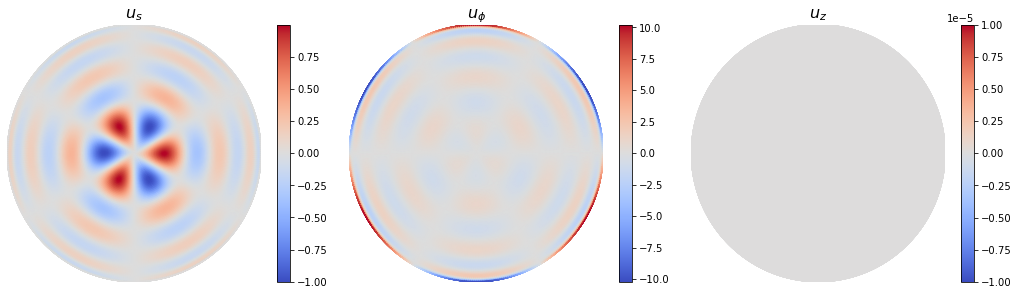

In [82]:
# plot_fields = [["Psi", "U_s", "U_p", "U_z"],
#                ["Mss", "Mpp", "Msp", "zMsp"], 
#                ["Msz", "Mpz", "zMss", "zMpp"], 
#                ["Bs_e", "Bp_e", "Bz_e", "Zeta"]]
# plot_fnames = [[None, r"$u_s$", r"$u_\phi$", r"$u_z$"],
#                [None, None, None, None], 
#                [None, None, None, None], 
#                [None, None, None, r"$\zeta$"]]
# plot_fields = [[ "Psi", "U_s", "U_p"], 
#                ["Zeta", "F_ext", None]]
# plot_fnames = [[None, r"$u_s$", r"$u_\phi$"], 
#                [r"$\zeta$", r"$F_\mathrm{Lorentz}$", None],]
plot_fields = [['U_s', 'U_p', 'U_z'],]
plot_fnames = [[r"$u_s$", r"$u_\phi$", "$u_z$"],]
rotate_us_max = True
if rotate_us_max:
    phi_rotate = p_array[np.unravel_index(np.argmax(np.real(eigmode_eval['U_s'])), eigmode_eval['U_s'].shape)[0]]
S_mesh, P_mesh = np.meshgrid(s_array, p_array - phi_rotate)
X_mesh, Y_mesh = S_mesh*np.cos(P_mesh), S_mesh*np.sin(P_mesh)

# save_name = "./out/eigen/Poloidal_Dipole/Reduced/mode-s_equatorial_m1n3_fast"
# save_name = "./out/eigen/Poloidal_Dipole/Transformed_ext/mode-s_equatorial_m3n5"
save_name = None
override = False

# max_norm = max([np.abs(np.real(eigmode_eval[plot_fields[i_r][i_c]])).max() 
#                 for i_r in range(nrows) for i_c in range(ncols) 
#                 if plot_fields[i_r][i_c] is not None and plot_fields[i_r][i_c] != "Zeta"])
# max_norm = np.abs(np.real(eigmode_eval["Psi"])).max()
max_norm = np.abs(np.real(eigmode_eval['U_s'])).max()

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4.8, nrows*4.2))
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        ax = axes[i_r][i_c]
        if fname is None:
            ax.remove()
            continue
        if np.abs(np.real(eigmode_eval[fname])/max_norm).max() > 1e-5:
            cm = ax.pcolormesh(X_mesh, Y_mesh, np.real(eigmode_eval[fname])/max_norm, shading="gouraud", cmap="coolwarm")
            plt.colorbar(cm, ax=ax)
        else:
            cm = ax.pcolormesh(X_mesh, Y_mesh, np.real(eigmode_eval[fname])/max_norm, shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
            plt.colorbar(cm, ax=ax)
        if fname in core.pgvar._field_names:
            ax.set_title(r'$%s$' % (core.pgvar[fname].name,), fontsize=16)
        else:
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
        # ax.axis("equal")
        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1])
        ax.axis("off")

plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.show()

### Meridional section

For meridional plane section, $\phi=Cst$. $s$ and $z$ form a mesh of grid points.

In [76]:
p_cst = phi_rotate - np.pi/12
xi_array, _ = specfun.roots_chebyt(120)
r_array = np.r_[0, np.sqrt((1 + xi_array)/2), 1]
theta_array = np.linspace(0, np.pi/2, num=200)
R_mesh, T_mesh = np.meshgrid(r_array, theta_array)
S_mesh, Z_mesh = R_mesh*np.sin(T_mesh), R_mesh*np.cos(T_mesh)

Calculate only the velocity and vorticity fields;

In [77]:
def calc_field_meridional(fname, field_f):
    if fname not in ("U_s", "U_p", "U_z", "Zeta", "Psi"):
        return None
    N_trial = field_nrange[fname]
    S_tmp, Z_tmp = np.stack([S_mesh,]*N_trial, axis=-1), np.stack([Z_mesh,]*N_trial, axis=-1)
    N_tmp = np.stack([N_tmp*np.ones_like(S_mesh) for N_tmp in np.arange(N_trial)], axis=-1)
    eval_tmp = field_f(S_tmp, p_cst, Z_tmp, N_tmp, *[vec for vec in eigvec])
    if np.array(eval_tmp).ndim == 0:
        return eval_tmp*np.ones_like(S_mesh[...,0])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    return np.sum(eval_tmp, axis=-1)

eigmode_eval = field_func.apply(calc_field_meridional, inplace=False, metadata=True)

Plot fields.

Note: physically, only plotting the fields defined in 3-D space make sense. Therefore, none of the PG variables have meridional plot, as all of the fields are defined in 2-D (most in the unit disk, $B_r$ on the surface of the sphere).

The only field with full volumetric definition is the velocity field, which of course takes the form of the ansatz.

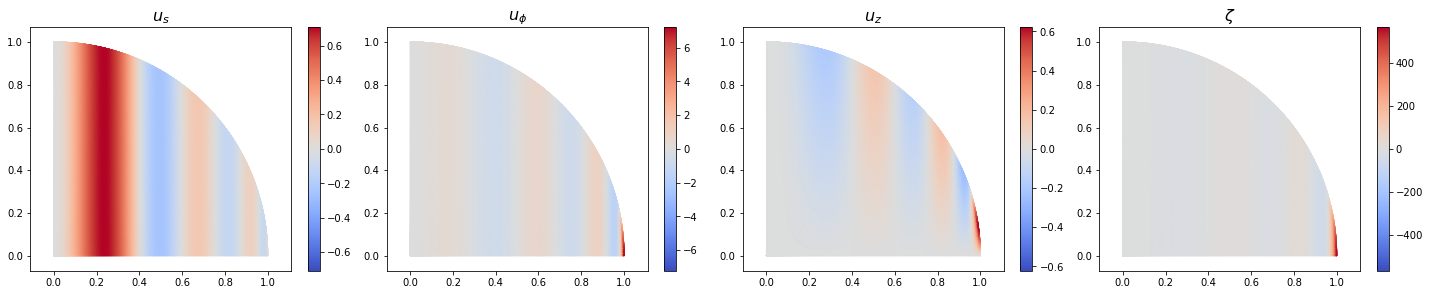

In [67]:
plot_fields = [["U_s", "U_p", "U_z", "Zeta"],]
plot_fnames = [[r"$u_s$", r"$u_\phi$", r"$u_z$", r"$\zeta$"],]
# save_name = "./out/eigen/Hydrodynamic/Reduced/mode_meridional_m3n10"
save_name = None
override = False

force_symmetric_cmap = True

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*4.2))
axes = np.atleast_2d(axes)

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        ax = axes[i_r][i_c]
        if fname is None:
            ax.remove()
            continue
        if np.abs(np.real(eigmode_eval[fname])).max() > 1e-5:
            if force_symmetric_cmap:
                climit = np.max(np.abs(np.real(eigmode_eval[fname])/max_norm))
                cm = ax.pcolormesh(S_mesh, Z_mesh, np.real(eigmode_eval[fname])/max_norm, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(S_mesh, Z_mesh, np.real(eigmode_eval[fname])/max_norm, shading="gouraud", cmap="coolwarm")
                plt.colorbar(cm, ax=ax)
        else:
            cm = ax.pcolormesh(S_mesh, Z_mesh, np.real(eigmode_eval[fname]), shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
            plt.colorbar(cm, ax=ax)
        if fname in core.pgvar._field_names:
            ax.set_title(r'$%s$' % (core.pgvar[fname].name,), fontsize=16)
        else:
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
        ax.axis("equal")
        # ax.grid()
        # ax.axis("off")

plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")

plt.tight_layout()
plt.show()

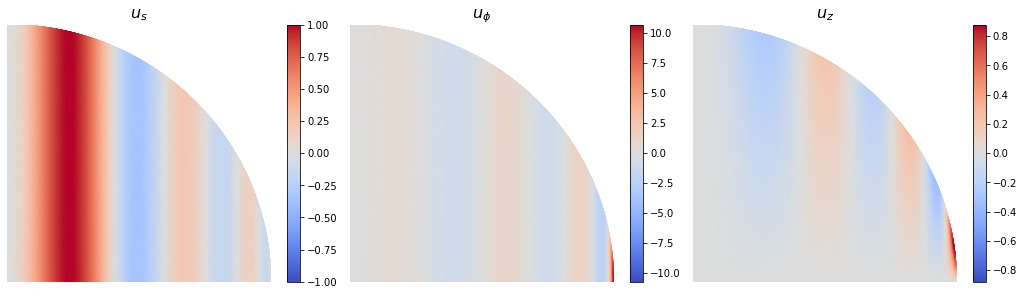

In [79]:
plot_fields = [["U_s", "U_p", "U_z", ],]
plot_fnames = [[r"$u_s$", r"$u_\phi$", r"$u_z$"],]
save_name = "./out/eigen/Poloidal_Dipole/Reduced/mode_meridional_m3n5_fast_pi-12"
# save_name = None
override = False

force_symmetric_cmap = True

nrows, ncols = len(plot_fields), len(plot_fields[0])
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4.8, nrows*4.2))
axes = np.atleast_2d(axes)

normalizer = np.max(np.abs(np.real(eigmode_eval["U_s"])))

for i_r in range(nrows):
    for i_c in range(ncols):
        fname = plot_fields[i_r][i_c]
        ax = axes[i_r][i_c]
        if fname is None:
            ax.remove()
            continue
        if np.abs(np.real(eigmode_eval[fname])).max() > 1e-5:
            if force_symmetric_cmap:
                climit = np.max(np.abs(np.real(eigmode_eval[fname])/normalizer))
                cm = ax.pcolormesh(S_mesh, Z_mesh, np.real(eigmode_eval[fname])/normalizer, shading="gouraud", cmap="coolwarm", vmin=-climit, vmax=+climit)
                plt.colorbar(cm, ax=ax)
            else:
                cm = ax.pcolormesh(S_mesh, Z_mesh, np.real(eigmode_eval[fname])/normalizer, shading="gouraud", cmap="coolwarm")
                plt.colorbar(cm, ax=ax)
        else:
            cm = ax.pcolormesh(S_mesh, Z_mesh, np.real(eigmode_eval[fname]), shading="gouraud", cmap="coolwarm", vmin=-1e-5, vmax=+1e-5)
            plt.colorbar(cm, ax=ax)
        if fname in core.pgvar._field_names:
            ax.set_title(r'$%s$' % (core.pgvar[fname].name,), fontsize=16)
        else:
            ax.set_title(plot_fnames[i_r][i_c], fontsize=16)
        # ax.axis("equal")
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        # ax.grid()
        ax.axis("off")

plt.tight_layout()
if save_name is not None:
    if os.path.exists(save_name + '.png') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.png', format="png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()

In [42]:
eig_vals_classes

[array([ 2.60902411e-15-1739.12950067j, -1.42108547e-14 -678.10050134j,
        -1.95056737e-13 -360.98630134j,  1.41729188e-13 -225.2742301j ,
        -1.12765599e-13 -156.19971218j, -2.71370084e-12 -118.13660941j]),
 array([-1.27384668e-13+0.00966861j, -8.23146422e-13+0.16196426j,
        -8.03446433e-12+0.54172711j, -3.84655040e-11+1.28144779j,
        -9.73812661e-11+2.51340236j, -3.98467474e-11+4.3113186j ,
         2.27644363e-10+6.59700952j])]

---
## Eigenmode spectrum

Read in eigenvalue solutions

In [24]:
from pg_utils.numerics import matrices as nmatrix
from pg_utils.pg_model import expansion as xpd
from pg_utils.pg_model import params

eigen_files_list = [
    # "./out/eigen/Malkus/Transformed/eigen_m3_N5.h5", 
    # "./out/eigen/Malkus/Transformed/eigen_m3_N50.h5",
    # "./out/eigen/Malkus/Reduced/eigen_m3_N50.h5",
    # "./out/eigen/Malkus/Reduced/eigen_m3_N50_cpt.h5",
    # "./out/eigen/Malkus/Reduced/eigen_m3_N50_quad-eigen-p113.h5",
    # "./out/eigen/Hydrodynamic/Reduced/eigen_m3_N5.h5", 
    # "./out/eigen/Hydrodynamic/Reduced/eigen_m1_N50.h5",
    # "./out/eigen/Hydrodynamic/Reduced/eigen_m2_N50.h5",
    # "./out/eigen/Hydrodynamic/Reduced/eigen_m3_N50.h5", 
    # "./out/eigen/Hydrodynamic/Reduced/eigen_m5_N50.h5",
    # "./out/eigen/Hydrodynamic/Reduced/eigen_m10_N50.h5",
    # "./out/eigen/Hydrodynamic/Reduced/eigen_m20_N50.h5",
    # "./out/eigen/Toroidal_Quadrupole/Transformed/eigen_m3_N20.h5",
    # "./out/eigen/Toroidal_Quadrupole/Transformed/eigen_m3_N50.h5",
    # "./out/eigen/Toroidal_Quadrupole/Reduced/eigen_m3_Le-4_N20_orth.h5",
    # "./out/eigen/Toroidal_Quadrupole/Reduced/eigen_m3_N20.h5",
    # "./out/eigen/Toroidal_Quadrupole/Reduced/eigen_m3_N50.h5",
    # "./out/eigen/Toroidal_Quadrupole/Reduced/eigen_m3_N100.h5",
    # "./out/eigen/Toroidal_Quadrupole/Reduced/eigen_m3_Le-4_N50_orth.h5",
    # "./out/eigen/Toroidal_Quadrupole/Reduced/eigen_m3_Le-2_N80.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_N20.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_N50.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_N50_quad-eigen-p113.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N50_p113.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N80_p113.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N120_p113.h5",
    "./out/eigen/Poloidal_Dipole/Reduced/eigen_m1_Le1e-5_N80_p113_hybrid.h5",
    "./out/eigen/Poloidal_Dipole/Reduced/eigen_m1_Le1e-5_N120_p113_hybrid.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N50_p113_cpt.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N80_p113_cpt.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_Le1e-4_N120_p113_cpt.h5",
    # "./out/eigen/Poloidal_Dipole/Transformed_ext/eigen_m3_Le1e-4_N80_p113.h5",
    # "./out/eigen/Poloidal_Dipole/Transformed_ext/eigen_m3_Le1e-4_N120_p113.h5",
]
label_list = [
    # For instance, the truncation level can be used as labels
    # 5,
    # 10,
    # 20,
    # 50,
    # "N=50 (Reduced - orth)",
    # "N=80 (Reduced - orth)",
    # "N=120 (Reduced - orth)",
    # "N=50 (Reduced - compact)",
    # "N=80 (Reduced - compact)",
    # "N=120 (Reduced - compact)",
    # "N=120 (Transformed)",
    80,
    120
    # Or the labels can be e.g. azimuthal wavenumber
    # 1, 2, 3, 5, 10, 20
]

eig_val_list = list()
eig_vec_list = list()
cnames_list = list()
ranges_list = list()
params_list = list()
for idx, fname in enumerate(eigen_files_list):
    with h5py.File(fname, 'r') as f:
        eig_vals = f["eigval"][()]
        eig_vecs = f["eigvec"][()]
        if "bases" in f.keys():
            cnames = list(f["bases"]["names"].asstr()[()])
            ranges = f["bases"]["ranges"][()]
        if "azm" in f.attrs.keys():
            params_list.append({
                xpd.m: f.attrs["azm"], 
                params.Le :f.attrs["Le"]})
        else:
            params_list.append({parse_expr(key): f.attrs[key] for key in f.attrs.keys()})
    eig_val_list.append(eig_vals)
    eig_vec_list.append(eig_vecs)
    cnames_list.append(cnames)
    ranges_list.append(ranges)

### Sorting eigenmodes

East/west splitting. The following code block classifies the eigenvalues into
1. Eastwards modes and their eigenvalues (imaginary part smaller than a negative threshold)
2. Westwards modes and their eigenvalues (imaginary part greater than a positive threshold)

In [3]:
func_collections = [
    lambda x: pproc.filter_sort(x, filter_op=np.less, threshold=-1e-7, transform_filter=np.imag, transform_sort=np.imag),
    lambda x: pproc.filter_sort(x, filter_op=np.greater, threshold=+1e-7, transform_filter=np.imag, transform_sort=np.imag)
]

Fast/slow splitting. The following code block classifies the eigenvalues into
1. Fast modes and their eigenvalues (absolute value of imaginary part greater than a threshold)
2. Slow modes and their eigenvalues (absolute value of imaginary part less than a threshold)

In [25]:
func_collections = [
    lambda x: pproc.filter_sort(x, filter_op=np.greater, threshold=1e+1, transform_filter=lambda x: np.abs(np.imag(x)), transform_sort=lambda x: np.abs(np.imag(x)), reversed=True),
    lambda x: pproc.filter_sort(x, filter_op=np.less, threshold=1e+1, transform_filter=lambda x: np.abs(np.imag(x)), transform_sort=lambda x: np.abs(np.imag(x)), remove_zero=1e-9)
]

Collect the results according to the classification criterion

In [26]:
ds_vals_collections = [list() for func in func_collections]
ds_vecs_collections = [list() for func in func_collections]

for i_src, label in enumerate(label_list):
    eig_vals_classes = pproc.classify_eigens_criteria(eig_val_list[i_src], func_collections)
    eig_vecs_classes = [eig_vec_list[i_src][:, eig_class[1]] for eig_class in eig_vals_classes]
    eig_vals_classes = [eig_class[0] for eig_class in eig_vals_classes]
    for i_ds, ds_tmp in enumerate(ds_vals_collections):
        ds_vals_collections[i_ds].append(eig_vals_classes[i_ds])
        ds_vecs_collections[i_ds].append(nmatrix.LabeledBlockArray(eig_vecs_classes[i_ds], cnames_list[i_src], ranges_list[i_src]))

### Eigenvalue spectrum

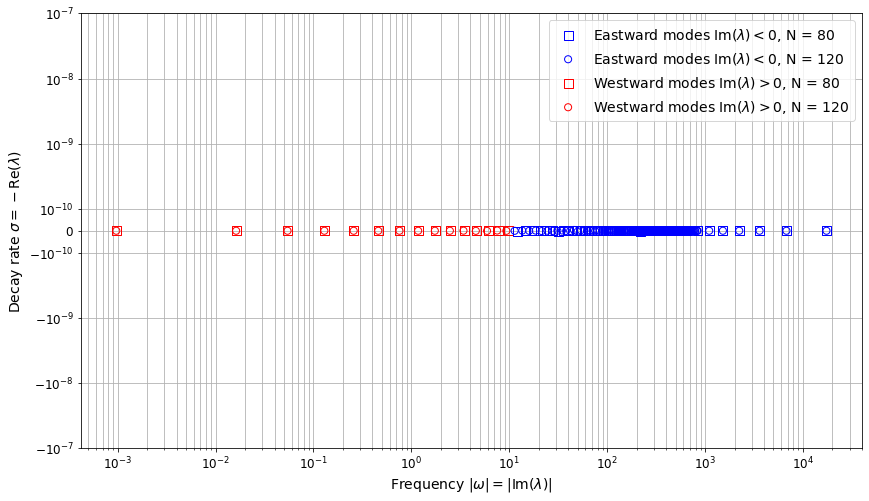

In [27]:
fig, ax = plt.subplots(figsize=(14, 8))
# save_name = "./out/eigen/Toroidal_Quadrupole/Spectrum_m3_Le-1e-4_east_on_top"
save_name = None
override = False

style_cfg = [
    [
        {'s': 80, "marker": 's', "edgecolors": 'b', "facecolors": "none", "linewidths": 1, 'zorder': 5},
        {'s': 50, "marker": 'o', "edgecolors": 'b', "facecolors": "none", "linewidths": 1, 'zorder': 5},
        {'s': 50, "marker": 'x', "color": 'b', "linewidths": 1, 'zorder': 5},
    ],
    [
        {'s': 80, "marker": 's', "edgecolors": 'r', "facecolors": "none", "linewidths": 1, 'zorder': 3},
        {'s': 50, "marker": 'o', "edgecolors": 'r', "facecolors": "none", "linewidths": 1, 'zorder': 3},
        {'s': 50, "marker": 'x', "color": 'r', "linewidths": 1, 'zorder': 3},
    ],
]
ds_name = [
    r"Eastward modes $\mathrm{Im}(\lambda) < 0$",
    r"Westward modes $\mathrm{Im}(\lambda) > 0$"
    # r"Fast modes $|\mathrm{Im}(\lambda)| > 1.$",
    # r"Slow modes $|\mathrm{Im}(\lambda)| < 1.$"
]

for i_ds in range(len(ds_vals_collections)):
    for i_src in range(len(label_list)):
        if style_cfg[i_ds][i_src] is None:
            continue
        label = "%s, %s" % (ds_name[i_ds], label_list[i_src]) if isinstance(label_list[i_src], str) else "%s, N = %d" % (ds_name[i_ds], label_list[i_src])
        ax.scatter(np.abs(np.imag(ds_vals_collections[i_ds][i_src])), -np.real(ds_vals_collections[i_ds][i_src]),
            **style_cfg[i_ds][i_src], label=label)
        # ax.scatter(np.imag(ds_vals_collections[i_ds][i_src]), -np.real(ds_vals_collections[i_ds][i_src]),
        #     **style_cfg[i_ds][i_src], label=label, zorder=5)

ax.set_xlabel(r"Frequency $|\omega| = |\mathrm{Im}(\lambda)|$", fontsize=14)
# ax.set_xlabel(r"Frequency $\omega = \mathrm{Im}(\lambda)$", fontsize=14)
ax.set_ylabel(r"Decay rate $\sigma = -\mathrm{Re}(\lambda)$", fontsize=14)

ax.set_xscale('log')
# ax.set_xscale('symlog', linthresh=1e-3, linscale=.1)
ax.set_yscale('symlog', linthresh=1e-10, linscale=.3)
# ax.set_xlim([4, 6])
ax.set_ylim([-1e-7, +1e-7])
ax.tick_params(axis='both', which='major', labelsize=12)

ax.grid(which="both")
ax.legend(fontsize=14)

if save_name is not None:
    if os.path.exists(save_name + '.pdf') and not override:
        print("File exists... aborting...")
    else:
        plt.savefig(save_name + '.pdf', format="pdf", bbox_inches="tight")
        plt.savefig(save_name + '.png', format="png", dpi=150, bbox_inches="tight")
plt.show()

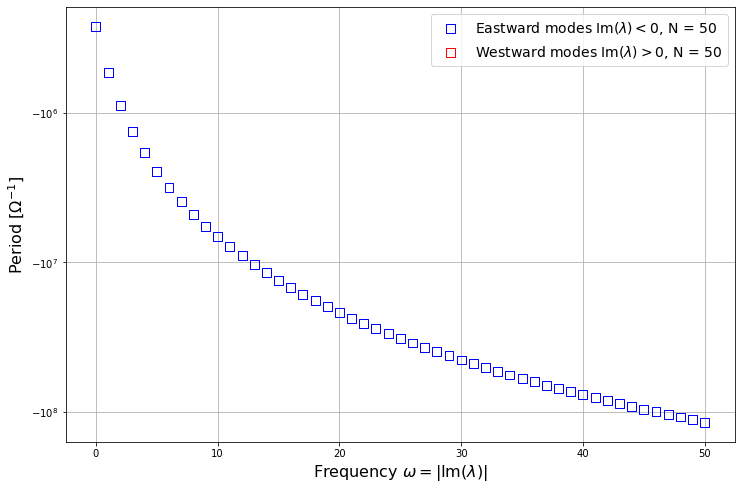

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

style_cfg = [
    [
        {'s': 80, "marker": 's', "edgecolors": 'b', "facecolors": "none", "linewidths": 1},
        {'s': 60, "marker": 'o', "edgecolors": 'b', "facecolors": "none", "linewidths": 1},
        {'s': 30, "marker": 'x', "color": 'b', "linewidths": 1},
    ],
    [
        {'s': 80, "marker": 's', "edgecolors": 'r', "facecolors": "none", "linewidths": 1},
        {'s': 60, "marker": 'o', "edgecolors": 'r', "facecolors": "none", "linewidths": 1},
        {'s': 30, "marker": 'x', "color": 'r', "linewidths": 1},
    ],
]
ds_name = [
    r"Eastward modes $\mathrm{Im}(\lambda) < 0$",
    r"Westward modes $\mathrm{Im}(\lambda) > 0$"
]

for i_ds in range(len(ds_vals_collections)):
    for i_src in range(len(label_list)):
        if style_cfg[i_ds][i_src] is None:
            continue
        ax.scatter(
            np.arange(ds_vals_collections[i_ds][i_src].size),
            np.sign(np.imag(ds_vals_collections[i_ds][i_src]))*2*np.pi/(params_list[i_src][params.Le]*np.abs(np.imag(ds_vals_collections[i_ds][i_src]))),
            **style_cfg[i_ds][i_src], label="%s, N = %d" % (ds_name[i_ds], label_list[i_src]), zorder=5)

ax.set_xlabel(r"Frequency $\omega = |\mathrm{Im}(\lambda)|$", fontsize=16)
ax.set_ylabel(r"Period [$\Omega^{-1}$]", fontsize=16)

ax.set_yscale('symlog', linthresh=20, linscale=0.1)
# ax.set_xlim([-1, 20])
# ax.set_ylim([1e+1, 1e+3])

ax.grid(which="both")
ax.legend(fontsize=14)

plt.show()

Inspect eigenvalues

In [246]:
class_idx = 0
trunc_N = min([ds_vals_collections[class_idx][i_src].size for i_src in range(len(label_list))])
trunc_N = 20

df = pd.DataFrame(data={label_list[i_src]: ds_vals_collections[class_idx][i_src][:trunc_N] for i_src in range(len(label_list))})
df.style.format(formatter=lambda x: "{0.real:.2e}, {0.imag:.7e}j".format(x))

,N=50 (Reduced - orth),N=80 (Reduced - orth),N=120 (Reduced - orth),N=50 (Reduced - compact),N=80 (Reduced - compact),N=120 (Reduced - compact)
0,"-2.37e-20, -2.3529309e+03j","-5.33e-15, -2.3529309e+03j","-2.13e-14, -2.3529309e+03j","4.00e-15, -2.3529309e+03j","-2.66e-15, -2.3529309e+03j","1.78e-15, -2.3529309e+03j"
1,"6.33e-15, -1.1651718e+03j","1.07e-14, -1.1651718e+03j","-5.33e-15, -1.1651718e+03j","-1.13e-14, -1.1651718e+03j","-1.60e-14, -1.1651718e+03j","-4.44e-16, -1.1651718e+03j"
2,"8.88e-16, -7.0223779e+02j","-1.60e-14, -7.0223779e+02j","-6.94e-13, -8.3726481e+02j","-2.29e-14, -7.0223779e+02j","-1.78e-15, -7.0223779e+02j","-2.60e+00, -7.9448043e+02j"
3,"2.68e-15, -4.7181032e+02j","-8.46e-13, -5.6289489e+02j","5.68e-13, 8.3627220e+02j","0.00e+00, -4.7181032e+02j","2.72e+00, -5.2588904e+02j","2.60e+00, -7.9448043e+02j"
4,"8.00e-15, -3.5875462e+02j","1.14e-13, 5.6071545e+02j","-8.36e-13, -7.9906038e+02j","1.02e-14, -3.4055481e+02j","-2.72e+00, -5.2588904e+02j","-2.44e+00, 7.9341499e+02j"
5,"1.17e-14, 3.5341229e+02j","-3.00e-13, -5.2949006e+02j","-1.16e-12, 7.9800231e+02j","3.08e+00, -3.2765750e+02j","2.31e+00, 5.2350150e+02j","2.44e+00, 7.9341499e+02j"
6,"0.00e+00, -3.4055481e+02j","-3.05e-14, 5.2712195e+02j","4.20e-13, -7.7268070e+02j","-3.08e+00, -3.2765750e+02j","-2.31e+00, 5.2350150e+02j","2.56e+00, -7.4824959e+02j"
7,"3.59e-13, -3.3027503e+02j","3.00e-14, -5.0658659e+02j","3.56e-15, 7.7156823e+02j","-1.85e+00, 3.2162419e+02j","-2.65e+00, -4.8584609e+02j","-2.56e+00, -7.4824959e+02j"
8,"1.67e-13, 3.2430009e+02j","2.41e-13, 5.0405620e+02j","2.51e-13, -7.5039236e+02j","1.85e+00, 3.2162419e+02j","2.65e+00, -4.8584609e+02j","-2.43e+00, 7.4708954e+02j"
9,"2.25e-14, -3.1100550e+02j","-9.57e-14, -4.8730652e+02j","2.08e-13, 7.4923434e+02j","-2.98e+00, -2.9409871e+02j","-2.32e+00, 4.8317350e+02j","2.43e+00, 7.4708954e+02j"


In [31]:
class_idx = 1
trunc_N = min([ds_vals_collections[class_idx][i_src].size for i_src in range(len(label_list))])
trunc_N = 20

df = pd.DataFrame(data={label_list[i_src]: ds_vals_collections[class_idx][i_src][:trunc_N] for i_src in range(len(label_list))})
df.style.format(formatter=lambda x: "{0.real:.2e}, {0.imag:.7e}j".format(x))

,80,120
0,"-1.86e-14, 9.6686554e-04j","-2.67e-15, 9.6685779e-04j"
1,"3.44e-14, 1.6200237e-02j","-3.02e-15, 1.6199738e-02j"
2,"-9.77e-15, 5.4266481e-02j","-3.64e-15, 5.4260253e-02j"
3,"-1.56e-14, 1.2911557e-01j","-2.19e-14, 1.2907486e-01j"
4,"3.27e-15, 2.5754216e-01j","1.50e-14, 2.5735793e-01j"
5,"1.38e-14, 4.5937862e-01j","3.03e-14, 4.5872530e-01j"
6,"-1.08e-14, 7.5749830e-01j","-2.96e-14, 7.5555534e-01j"
7,"-4.00e-14, 1.1776629e+00j","3.55e-14, 1.1726078e+00j"
8,"-8.92e-14, 1.7480455e+00j","-5.85e-15, 1.7362012e+00j"
9,"1.57e-13, 2.4982180e+00j","4.66e-14, 2.4726913e+00j"


### Eigen solution filtering

1. Boyd's drift method:

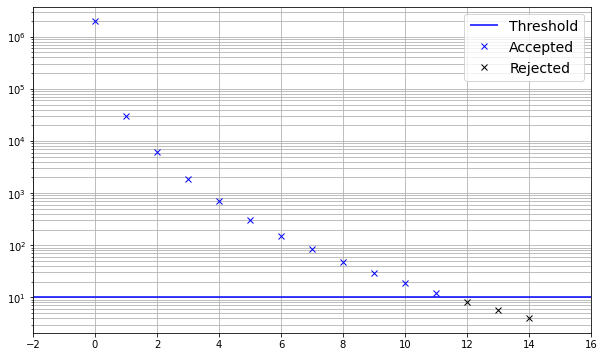

In [28]:
class_idx = 1

src_idx_base = 0
src_idx_comp = 1

eig_drift, eig_nearest = nutils.eigen_drift(ds_vals_collections[class_idx][src_idx_base], ds_vals_collections[class_idx][src_idx_comp])
drift_thresh = 1e+1
drift_filter = 1./(eig_drift + 1e-16) > drift_thresh

fig, ax = plt.subplots(figsize=(10, 6))
ax.hlines([drift_thresh,], -2, eig_drift.size + 1, 'b', label="Threshold")
ax.semilogy(np.arange(eig_drift.size)[drift_filter], 1./(eig_drift[drift_filter] + 1e-16), 'bx', label="Accepted")
ax.semilogy(np.arange(eig_drift.size)[~drift_filter], 1./(eig_drift[~drift_filter] + 1e-16), 'kx', label="Rejected")
ax.grid(which="both")
ax.set_xlim([-2, eig_drift.size + 1])
ax.legend(fontsize=14)

plt.show()

2. Maximum trailing rate of exponential convergence

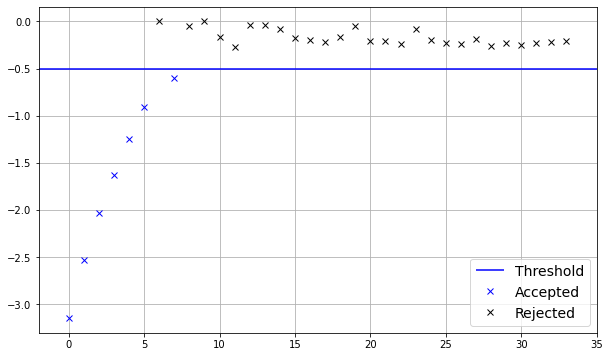

In [39]:
class_idx = 0

src_idx = 0

tail_exp_rates = nutils.spec_tail_exp_rate(ds_vecs_collections[0][0]["Psi"])
rate_thresh = -0.5
rate_filter = tail_exp_rates < rate_thresh

fig, ax = plt.subplots(figsize=(10, 6))
ax.hlines([rate_thresh,], -2, tail_exp_rates.size + 1, 'b', label="Threshold")
ax.plot(np.arange(tail_exp_rates.size)[rate_filter], tail_exp_rates[rate_filter], 'bx', label="Accepted")
ax.plot(np.arange(tail_exp_rates.size)[~rate_filter], tail_exp_rates[~rate_filter], 'kx', label="Rejected")
ax.grid(which="both")
ax.set_xlim([-2, tail_exp_rates.size + 1])
ax.legend(fontsize=14)

plt.show()

Apply the filter (optional)

In [29]:
final_filter = drift_filter

# Filter eigenvalues
ds_vals_collections[class_idx][src_idx_base] = ds_vals_collections[class_idx][src_idx_base][final_filter]
ds_vals_collections[class_idx][src_idx_comp] = ds_vals_collections[class_idx][src_idx_comp][eig_nearest[final_filter]]

# Filter eigenvectors
ds_vecs_collections[class_idx][src_idx_base]._array = ds_vecs_collections[class_idx][src_idx_base]._array[:, final_filter]
ds_vecs_collections[class_idx][src_idx_comp]._array = ds_vecs_collections[class_idx][src_idx_comp]._array[:, eig_nearest[final_filter]]

### Eigenvalue plot

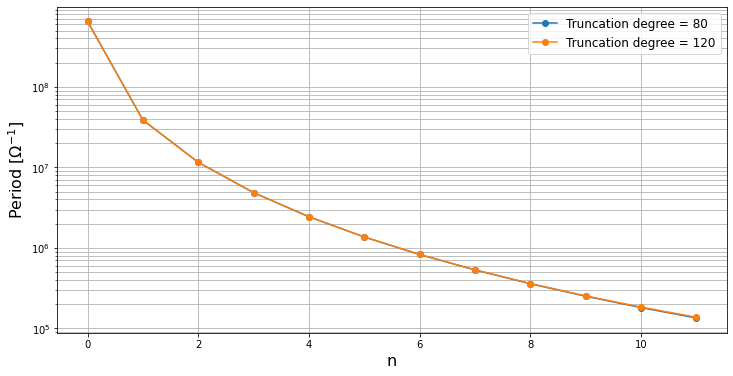

In [30]:
class_idx = 1
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
# save_name = "./out/cases/Hydrodynamic/Recipe_Conjugate/m3_leading_10_eigenmodes"
# save_name = "./out/eigen/Poloidal_Dipole/Reduced/convspec_m3_slow_8"
save_name = None

scale = 1/params_list[0][params.Le]
# scale = 1

for i_src in range(len(label_list)):
    ax.plot(2*np.pi*scale/np.abs(np.imag(ds_vals_collections[class_idx][i_src])), 
            'o-',
            label="Truncation degree = {}".format(label_list[i_src]))

ax.set_yscale("log")
ax.set_xlabel("n", fontsize=16)
ax.set_ylabel(r"Period [$\Omega^{-1}$]", fontsize=16)
ax.legend(fontsize=12)
ax.grid(which="both")

# ax.set_xlim([-1, 20])
# ax.set_ylim([10, 1e+3])

if save_name is not None:
    plt.savefig(save_name + ".pdf", format="pdf", bbox_inches="tight")
    plt.savefig(save_name + ".png", format="png", bbox_inches="tight", dpi=150)

plt.show()

Mimicing the wavenumber-period plot

In [ ]:
class_idx = 0

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
# save_name = "./out/eigen/Hydrodynamic/Period_wavenumber_plot_m20_n10"
save_name = None

# scale = 1/params_list[i_src][params.Le]
scale = 1

plot_orders = [0, 2, 5, 9]

for order in plot_orders:
    ax.semilogy(label_list,
        2*np.pi*scale/np.abs(np.imag([ds[order] for ds in ds_vals_collections[class_idx]])), 
        's--',
        label="n = {:d}".format(order))

ax.set_xscale("log")
ax.set_xlabel("Azimuthal wavenumber m", fontsize=16)
ax.set_ylabel(r"Period [$\Omega^{-1}$]", fontsize=16)
ax.legend(fontsize=14)
ax.grid(which="both")

# ax.set_xlim([-1, 20])
# ax.set_ylim([10, 1e+3])

if save_name is not None:
    plt.savefig(save_name + ".pdf", format="pdf", bbox_inches="tight")
    plt.savefig(save_name + ".png", format="png", bbox_inches="tight", dpi=150)

plt.show()

### Spectrum of the solution

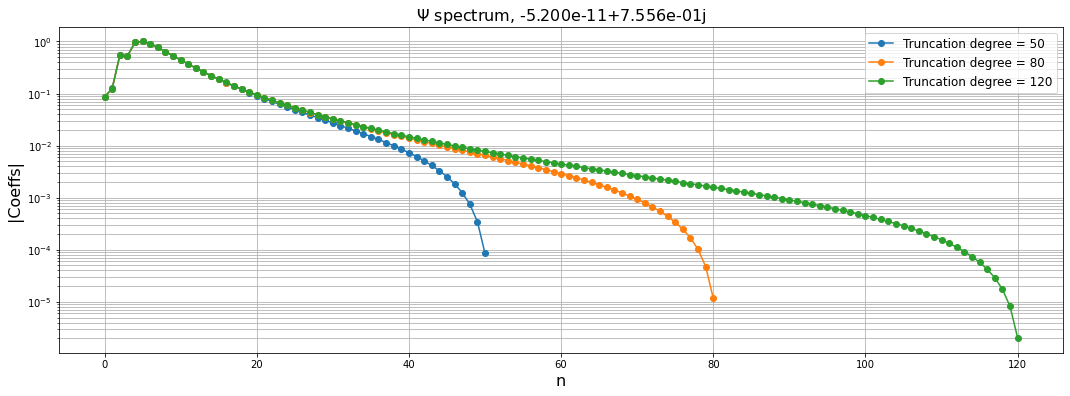

In [28]:
# Choose which field to check
class_idx = 1
# mode_idx = [3,3,3]
mode_idx = 3*np.ones(len(label_list), dtype=np.int32)
field_name = "Psi"
field_title = r"$\Psi$"

save_name = "./out/eigen/Poloidal_dipole/Reduced/modespec_Le1e-4_slow_m3n%d" % mode_idx[0]
# save_name = None

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))

for i_src in range(len(label_list)):
    eig_cfs = ds_vecs_collections[class_idx][i_src][field_name]
    # if eig_cfs.shape[1] <= 50:
    #     continue
    ax.plot(np.abs(eig_cfs[:, mode_idx[i_src]])/np.max(np.abs(eig_cfs[:, mode_idx[i_src]])), 
            'o-', label="Truncation degree = {}".format(label_list[i_src]))

# coeff_min = np.abs(np.abs(eig_cfs[:, mode_idx[i_src]])).min()/np.max(np.abs(eig_cfs[:, mode_idx[i_src]]))
# ax.fill_between([-5, 50+5], min([1e-20, coeff_min])*np.ones(2), 5*np.finfo(np.float64).eps*np.ones(2), 
#     facecolor="gray", alpha=0.4, label="$\leq 5\epsilon_{\mathrm{mach}}$")

ax.set_title(r"{:s} spectrum, {:.3e}".format(field_title, ds_vals_collections[class_idx][-1][mode_idx[1]]), fontsize=16)
ax.set_yscale("log")
ax.set_xlabel("n", fontsize=16)
ax.set_ylabel(r"|Coeffs|", fontsize=16)
ax.legend(fontsize=12)
ax.grid(which="both")

# ax.set_xlim([-5, 50+5])
# ax.set_ylim([min([1e-16, coeff_min]), 10])

if save_name is not None:
    plt.savefig(save_name + ".pdf", format="pdf", bbox_inches="tight")
    plt.savefig(save_name + ".png", format="png", bbox_inches="tight", dpi=150)

plt.show()

### Compare eigenvectors

In [91]:
field_name = "Psi"

eig_vecs = [
    # ds_vecs_collections[class_idx][i_src][field_name][:, mode_idx[i_src]] / np.abs(ds_vecs_collections[class_idx][i_src][field_name][:, mode_idx[i_src]]).max() 
    nutils.normalize(ds_vecs_collections[class_idx][i_src][field_name][:, mode_idx[i_src]], mode="max", zero_phase=True)
    for i_src in range(len(label_list))
]

N_trunc = 80
eig_vec_base = eig_vecs[2][:N_trunc]
eig_vec_comp = eig_vecs[1][:N_trunc]

shift_vec = eig_vec_comp / eig_vec_base
scaling = np.abs(shift_vec)
phase = np.angle(shift_vec)

Plotting the scaling and phase

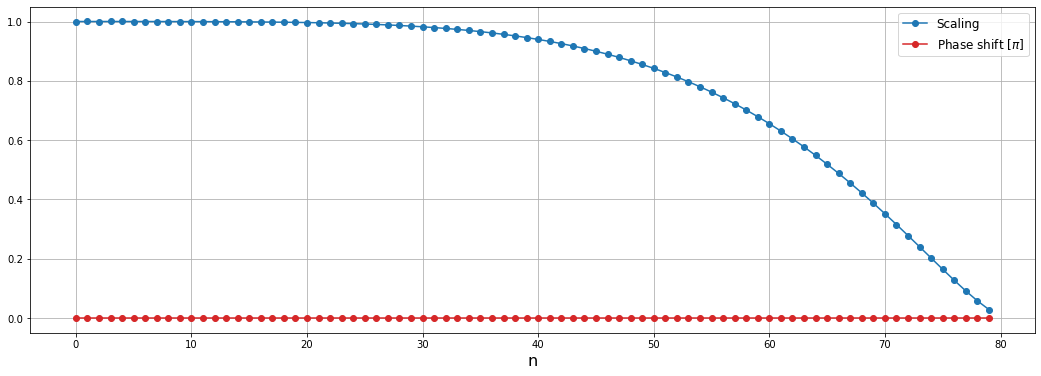

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
save_name = "./out/eigen/Poloidal_Dipole/cf_scale_m3n3_slow_N80-120"

ax = axes
ax.plot(scaling, 'o-', color="tab:blue", label="Scaling")

ax.plot(phase / np.pi, 'o-', color="tab:red", label=r"Phase shift [$\pi$]")
# ax.set_title(r"{:s} spectrum, {}".format(field_title, ds_vals_collections[class_idx][-1][mode_idx[1]]), fontsize=16)
# ax.set_yscale("log")
ax.set_xlabel("n", fontsize=16)
ax.legend(fontsize=12)
ax.grid(which="both")

# ax.set_xlim([-5, 50+5])
# ax.set_ylim([min([1e-16, coeff_min]), 10])

if save_name is not None:
    plt.savefig(save_name + ".pdf", format="pdf", bbox_inches="tight")
    plt.savefig(save_name + ".png", format="png", bbox_inches="tight", dpi=150)

plt.show()

Plotting the scaling and phase for a series of resolutions

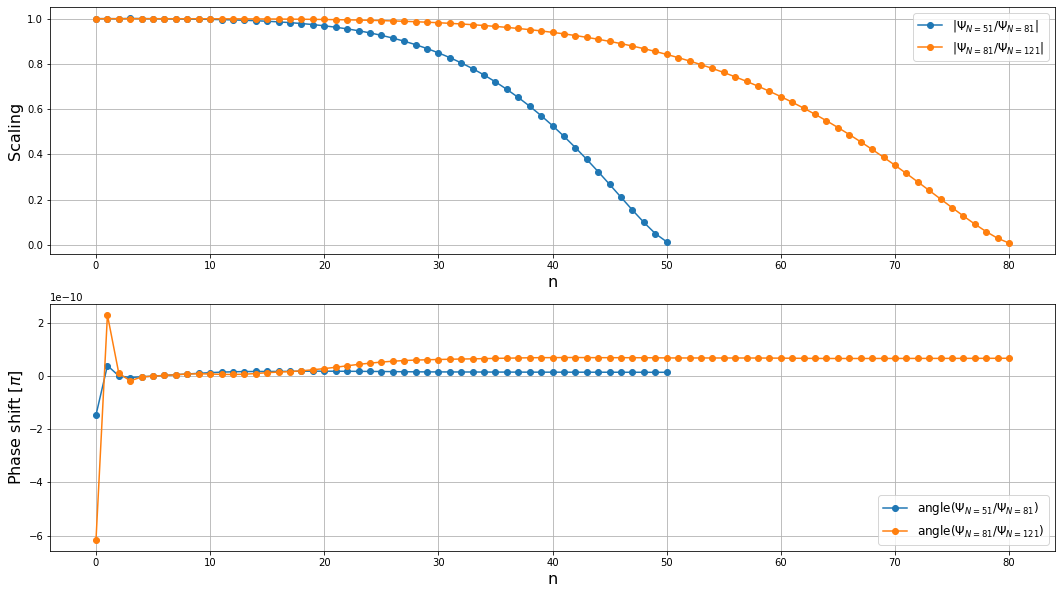

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
save_name = "./out/eigen/Poloidal_Dipole/Reduced/cf_scale_m3n3_slow"
# save_name = None

for i_src in range(len(eig_vecs) - 1):
    
    N_trunc = eig_vecs[i_src].size
    shift_vec = eig_vecs[i_src][:N_trunc] / eig_vecs[i_src+1][:N_trunc]
    scaling = np.abs(shift_vec)
    phase = np.angle(shift_vec)
    
    ax = axes[0]
    ax.plot(scaling, 'o-', label=r"$|\Psi_{N=%d}/\Psi_{N=%d}|$" % (eig_vecs[i_src].size, eig_vecs[i_src+1].size))

    ax = axes[1]
    ax.plot(phase / np.pi, 'o-', label=r"angle($\Psi_{N=%d}/\Psi_{N=%d}$)" % (eig_vecs[i_src].size, eig_vecs[i_src+1].size))

ax = axes[0]
ax.set_xlabel("n", fontsize=16)
ax.set_ylabel('Scaling', fontsize=16)
ax.legend(fontsize=12)
ax.grid(which="both")

ax = axes[1]
ax.set_xlabel("n", fontsize=16)
ax.set_ylabel(r'Phase shift [$\pi$]', fontsize=16)
ax.legend(fontsize=12)
ax.grid(which="both")

# ax.set_xlim([-5, 50+5])
# ax.set_ylim([min([1e-16, coeff_min]), 10])

if save_name is not None:
    plt.savefig(save_name + ".pdf", format="pdf", bbox_inches="tight")
    plt.savefig(save_name + ".png", format="png", bbox_inches="tight", dpi=150)

plt.show()

Simple relative error:

In [225]:
rel_err_vec = np.linalg.norm(eig_vec_comp - eig_vec_base) / np.linalg.norm(eig_vec_base)
print(rel_err_vec)

0.0006428111050210846


---

## Miscellaneous

### Peek eigenvalues

In [16]:
matrix_files = [
    # "./out/eigen/Hydrodynamic/Reduced/eigen_m3_N50_quad-eigen-p113.h5",
    # "./out/eigen/Hydrodynamic/Reduced/eigen_m3_N50_quad-eigen-p113_tmp.h5"
    # "./out/eigen/Malkus/Reduced/eigen_m3_N50.h5",
    # "./out/eigen/Malkus/Reduced/eigen_m3_N50_quad-eigen-p113.h5",
    "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_N50.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_N50_quad-eigen-p113.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_N50_quad-eigen-p113_tmp.h5",
    # "./out/eigen/Poloidal_Dipole/Reduced/eigen_m3_N50_quad-eigen-p113_tmp2.pkl"
    "./out/tmp/Poloidal_Dipole/Reduced/eigen_m3_N50.h5",
]

eig_vals_list = list()
eig_vecs_list = list()

for fname in matrix_files:
    if fname.split('.')[-1] == "h5":
        with h5py.File(fname, 'r') as fread:
            eig_vals_list.append(fread["eigval"][()])
            eig_vecs_list.append(fread["eigvec"][()])
    elif fname.split('.')[-1] == "pkl":
        with open(fname, 'rb') as fread:
            obj = pickle.load(fread)
            eig_vals_list.append(obj["eigval"])
            eig_vecs_list.append(obj["eigvec"])

In [17]:
np.min(eig_vals_list[0] == eig_vals_list[1])

True

In [14]:
eig_vals_list[0][:5]

array([ 0.00000000e+00-1663.76606897j, -1.57651676e-14 -823.98805209j,
        0.00000000e+00 -496.89843267j,  4.57242444e-14 -357.96745653j,
        0.00000000e+00 +354.18985239j])

In [15]:
eig_vals_list[1][:5]

array([ 6.66133815e-16-1663.76606897j, -6.37268017e-14 -823.98805209j,
        1.99906714e-15 -496.89843267j,  3.95425225e-14 -357.96745653j,
        1.13686838e-13 +354.18985239j])

In [29]:
eig_vals_list[2][:5]

array([mpc('-4.37176257055885008861828646310564888e-30-1663.76606896854531651837888234808151j',(113,113)),
       mpc('-8.57173807047490802219657000512931197e-30-823.988052092642926847792096311542104j',(113,113)),
       mpc('3.38963782268845635161503897492541003e-26-496.898432667359485742823259177467359j',(113,113)),
       mpc('3.28662213827694472201824061113075804e-19-357.967456536381365316546870053347652j',(113,113)),
       mpc('-3.25700024307289437591734336095602145e-19+354.18985239205286017554041272857083j',(113,113))],
      dtype=object)

### Compare matrices

In [9]:
from pg_utils.numerics import io as num_io

matrix_files = [
    # "./out/eigen/Poloidal_Dipole/Reduced/matrix_m3_N50_quad-p113_tmp.pkl",
    # "./out/eigen/Poloidal_Dipole/Reduced/matrix_m3_N50_quad-p113.pkl"
    "./out/eigen/Poloidal_Dipole/Reduced/matrix_m3_N50.h5",
    "./out/tmp/Poloidal_Dipole/Reduced/matrix_m3_N50.h5",
]

M_list = list()
K_list = list()

for fname in matrix_files:
    if fname.split('.')[-1] == "h5":
        with h5py.File(fname, 'r') as fread:
            M_list.append(num_io.matrix_load_from_group(fread["M"]).todense())
            K_list.append(num_io.matrix_load_from_group(fread["K"]).todense())
    elif fname.split('.')[-1] == "pkl":
        with open(fname, 'rb') as fread:
            obj = pickle.load(fread)
            print(obj.keys())
            M_list.append(nutils.to_dense_gmpy2(num_io.parse_coo(obj["M"]), prec=113))
            K_list.append(nutils.to_dense_gmpy2(num_io.parse_coo(obj["K"]), prec=113))

In [10]:
np.min(K_list[0] == K_list[1])

True

In [18]:
K_list[1][:10, 3]

array([mpc('0.0-2.78657988828528187489036808567756671e-33j',(113,113)),
       mpc('0.0+5.87336410665192413837583673315555897e-31j',(113,113)),
       mpc('0.0-6.7805974810798364274060183427344713e-31j',(113,113)),
       mpc('0.0+825.567053741666918120779066732327512j',(113,113)),
       mpc('0.0+2.42306061128219110762605224901466168e-31j',(113,113)),
       mpc('0.0+9.91227994127500612671585447599897468e-31j',(113,113)),
       mpc('0.0+1.18733581071473090340901040160360769e-30j',(113,113)),
       mpc('0.0-1.887892827985587944958122378218875e-31j',(113,113)),
       mpc('0.0+7.13653340892690245349892626624844818e-31j',(113,113)),
       mpc('0.0+4.04926770807416338105019362428480969e-31j',(113,113))],
      dtype=object)

### Matrix visualization

In [44]:
np.abs(np.diag(M_tmp)).min()

0.0022093848995876704

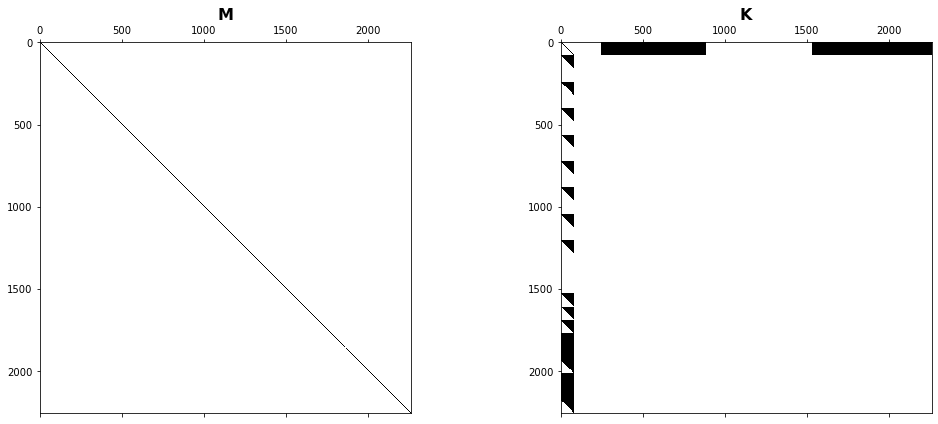

In [124]:
from pg_utils.numerics import io as num_io

# matrix_file = "./out/eigen/Malkus/Transformed/matrix_m1_N50.h5"
# matrix_file = "./out/cases/Malkus/Reduced_sys/Matrix_eval.h5"
# matrix_file = "./out/cases/Hydrodynamic/Recipe_Conjugate/Matrix_eval_N10.h5"
# matrix_file = "./out/eigen/Hydrodynamic/Transformed/matrix_m3_N5.h5"
# matrix_file = "./out/eigen/Toroidal_Quadrupole/Transformed/matrix_m3_N20.h5"
# matrix_file = "./out/eigen/Toroidal_Quadrupole/Reduced/matrix_m3_Le-2_N50.h5"
# matrix_file = "./out/eigen/Poloidal_Dipole/Reduced/matrix_m3_N50_p-quad.h5"
matrix_file = "./out/eigen/Poloidal_Dipole/Transformed_ext/matrix_m3_Le1e-4_N80_p113.h5"

with h5py.File(matrix_file, 'r') as fread:
    M_tmp = num_io.matrix_load_from_group(fread["M"])
    K_tmp = num_io.matrix_load_from_group(fread["K"])
    if not isinstance(M_tmp, np.ndarray):
        M_tmp = M_tmp.todense()
        K_tmp = K_tmp.todense()

visual_prec = 1e-25
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax = axes[0]
ax.spy(M_tmp, precision=visual_prec)
ax.set_title(r"$\mathbf{M}$", fontsize=16)
# ax.set_xlim([700, 900])
# ax.set_ylim([900, 700])

ax = axes[1]
ax.spy(K_tmp, precision=visual_prec)
ax.set_title(r"$\mathbf{K}$", fontsize=16)

plt.tight_layout()
# plt.savefig("./out/imgs/sparsity__Poloidal_Dipole_cg_N50_p113_chop1e-20.pdf", format="pdf", bbox_inches="tight")
plt.show()

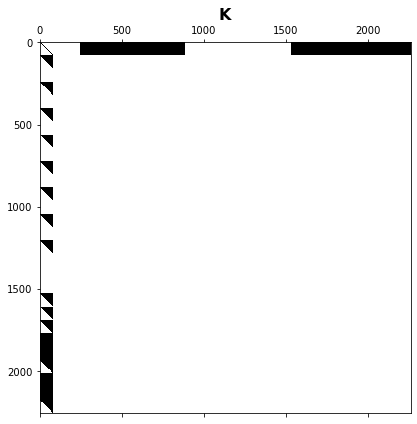

In [129]:
K_chop = K_tmp.copy()
K_chop[np.abs(K_chop) < visual_prec] = 0.
K_ord = (K_chop.T/np.diag(M_tmp)).T

visual_prec = 1e-25
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

ax.spy(K_ord, precision=visual_prec)
ax.set_title(r"$\mathbf{K}$", fontsize=16)

plt.tight_layout()
# plt.savefig("./out/imgs/sparsity__Poloidal_Dipole_cg_N50_p113_chop1e-20.pdf", format="pdf", bbox_inches="tight")
plt.show()

C:\Users\gentle\AppData\Local\Temp\ipykernel_14484\2896541416.py:32: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(np.abs(M_tmp)), vmin=vrange[0], vmax=vrange[1])
C:\Users\gentle\AppData\Local\Temp\ipykernel_14484\2896541416.py:37: RuntimeWarning: divide by zero encountered in log10
  ax.imshow(np.log10(np.abs(K_tmp)), vmin=vrange[0], vmax=vrange[1])


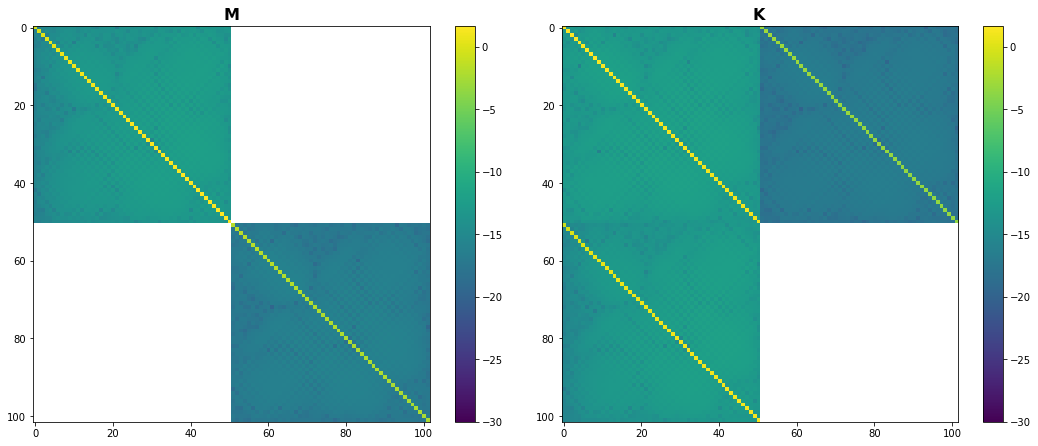

In [122]:
from pg_utils.numerics import io as num_io
import gmpy2 as gp

matrix_file = "./out/eigen/Malkus/Reduced/matrix_m3_N50_cpt.h5"
with h5py.File(matrix_file, 'r') as fread:
    M_tmp = num_io.matrix_load_from_group(fread["M"])
    K_tmp = num_io.matrix_load_from_group(fread["K"])
    if not isinstance(M_tmp, np.ndarray):
        M_tmp = M_tmp.todense()
        K_tmp = K_tmp.todense()
# M_tmp[np.abs(M_tmp) < 1e-10] = 0.
# K_tmp[np.abs(K_tmp) < 1e-10] = 0.

# matrix_file = "./out/eigen/Malkus/Reduced/matrix_m3_N50_quad-p113.pkl"
# with open(matrix_file, 'rb') as fread:
#     matrix_obj = pickle.load(fread)
#     M_tmp = num_io.parse_coo(matrix_obj["M"])
#     K_tmp = num_io.parse_coo(matrix_obj["K"])
# M_tmp = nutils.to_dense_gmpy2(M_tmp, prec=113)
# K_tmp = nutils.to_dense_gmpy2(K_tmp, prec=113)

# M_tmp[np.abs(M_tmp) < 1e-25] = gp.mpc("0.", 113)
# K_tmp[np.abs(K_tmp) < 1e-25] = gp.mpc("0.", 113)

M_tmp = M_tmp.astype(np.complex128)
K_tmp = K_tmp.astype(np.complex128)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
vrange = [-30, None]

ax = axes[0]
im = ax.imshow(np.log10(np.abs(M_tmp)), vmin=vrange[0], vmax=vrange[1])
ax.set_title(r"$\mathbf{M}$", fontsize=16)
plt.colorbar(im, ax=ax)

ax = axes[1]
ax.imshow(np.log10(np.abs(K_tmp)), vmin=vrange[0], vmax=vrange[1])
ax.set_title(r"$\mathbf{K}$", fontsize=16)
plt.colorbar(im, ax=ax)

plt.tight_layout()
# plt.savefig("./out/eigen/Malkus/Reduced/matview_prec-np.png", format="png", dpi=150, bbox_inches="tight")
plt.show()

### Output to 3-D visualization

In [115]:
r_array = np.arange(0.05, 1, 0.1)
theta_array = np.arange(0, 181, 5)
phi_array = np.arange(0, 360, 5)

R_mesh, Phi_mesh, Theta_mesh = np.meshgrid(r_array, np.radians(phi_array), np.radians(theta_array), indexing='ij')
S_mesh = R_mesh*np.sin(Theta_mesh)
Z_mesh = R_mesh*np.cos(Theta_mesh)

def calc_field_3d(fname, field_f):
    N_trial = field_nrange[fname]
    S_tmp, P_tmp, Z_tmp = np.stack([S_mesh,]*N_trial, axis=-1), np.stack([Phi_mesh,]*N_trial, axis=-1), np.stack([Z_mesh,]*N_trial, axis=-1)
    N_tmp = np.stack([N_tmp*np.ones_like(S_mesh) for N_tmp in np.arange(N_trial)], axis=-1)
    eval_tmp = field_f(S_tmp, P_tmp, Z_tmp, N_tmp, *[vec for vec in eigvec])
    eval_tmp[np.isnan(eval_tmp)] = 0.
    return np.sum(eval_tmp, axis=-1)

Zeta_mesh = calc_field_3d("Zeta", field_func.Zeta)
Uz_mesh = calc_field_3d("U_z", field_func.U_z)

In [117]:
np.savez("./out/cases/Malkus/3darray.npz", r_array=r_array, theta_array=theta_array, phi_array=phi_array, Zeta=Zeta_mesh, Uz=Uz_mesh)

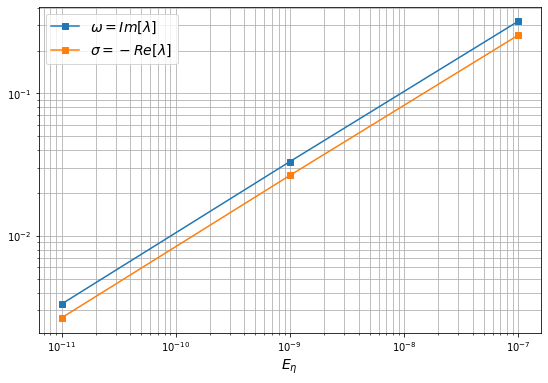

In [46]:
fig, ax = plt.subplots(figsize=(9, 6))

ax.loglog([1e-7, 1e-9, 1e-11], np.imag([-2.5603e-1+3.2056e-1j, -2.6542e-2+3.3182e-2j, -2.6553e-3+3.3194e-3j]), 's-', label='$\omega = Im[\lambda]$')
ax.loglog([1e-7, 1e-9, 1e-11], -np.real([-2.5603e-1+3.2056e-1j, -2.6542e-2+3.3182e-2j, -2.6553e-3+3.3194e-3j]), 's-', label='$\sigma = -Re[\lambda]$')

ax.grid(which="both")
ax.set_xlabel("$E_\eta$", fontsize=14)
# ax.set_ylabel("$Im[\lambda]$", fontsize=14)
ax.legend(fontsize=14)

plt.show()